In [ ]:
!pip install "numpy<2.0" scikit-learn pmdarima statsmodels joblib -U

In [ ]:
sklearn_version = !pip show scikit-learn
print(sklearn_version)

['Name: scikit-learn', 'Version: 1.7.2', 'Summary: A set of python modules for machine learning and data mining', 'Home-page: https://scikit-learn.org', 'Author: ', 'Author-email: ', 'License: ', 'Location: /usr/local/lib/python3.12/dist-packages', 'Requires: joblib, numpy, scipy, threadpoolctl', 'Required-by: cuml-cu12, esda, fastai, hdbscan, imbalanced-learn, libpysal, librosa, mapclassify, mlxtend, pmdarima, pynndescent, pysal, segregation, sentence-transformers, shap, sklearn-pandas, spopt, spreg, tsfresh, umap-learn, yellowbrick']


In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.impute import SimpleImputer

#importa metricas
from sklearn import metrics

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import GridSearchCV
import joblib

In [ ]:
feature_selected = 100

In [ ]:
data = pd.read_csv('path/CIC2017_1132_features_extrated.csv', low_memory=False)


In [ ]:
data.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Idle Min_ARIMA_forecast_2,Idle Min_ARIMA_forecast_3,Idle Min_ARIMA_forecast_4,Idle Min_ARIMA_forecast_5,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,1.104441e+06,979028.757647,926504.082905,893188.591632,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,9.790288e+05,926504.082905,893188.591632,873763.115207,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,9.265041e+05,893188.591632,873763.115207,860453.163786,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,8.931886e+05,873763.115207,860453.163786,851986.646158,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,8.737631e+05,860453.163786,851986.646158,846199.079134,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
data.shape

(16497, 1132)

In [ ]:
holder_features = [coluna for coluna in data.columns if 'holder' in coluna.lower()]
print(holder_features)

['Bwd IAT Mean_holder_j5', 'Bwd IAT Min_holder_j5', 'Fwd Seg Size Min_holder_j5', 'Active Mean_holder_j5', 'Active Min_holder_j5']


In [ ]:
dt = data.copy()

In [ ]:
dt = dt.drop(columns=holder_features)
dt.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Idle Max_ARIMA_forecast_4,Idle Max_ARIMA_forecast_5,Idle Min_ARIMA_fitted_5,Idle Min_ARIMA_resid_5,Idle Min_ARIMA_forecast_1,Idle Min_ARIMA_forecast_2,Idle Min_ARIMA_forecast_3,Idle Min_ARIMA_forecast_4,Idle Min_ARIMA_forecast_5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,2.085994e+06,1.892660e+06,1.867014e+07,-1.867014e+07,1.471640e+06,1.104441e+06,979028.757647,926504.082905,893188.591632,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,1.892660e+06,1.776505e+06,1.471640e+06,-1.471640e+06,1.104441e+06,9.790288e+05,926504.082905,893188.591632,873763.115207,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,1.776505e+06,1.704038e+06,1.104441e+06,-1.104441e+06,9.790288e+05,9.265041e+05,893188.591632,873763.115207,860453.163786,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,1.704038e+06,1.657760e+06,9.790288e+05,-9.790288e+05,9.265041e+05,8.931886e+05,873763.115207,860453.163786,851986.646158,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,1.657760e+06,1.627763e+06,9.265041e+05,-9.265041e+05,8.931886e+05,8.737631e+05,860453.163786,851986.646158,846199.079134,Benign


In [ ]:
dt.shape

(16497, 1127)

In [ ]:
print(f'Linhas: {dt.shape[0]}')
print(f'Colunas: {dt.shape[1]}')

Linhas: 16497
Colunas: 1127


In [ ]:
# Obter rótulos das classes

names = ['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']
label_map = {'Benign': 0, 'DoS attacks-Slowloris': 1, 'DoS attacks-SlowHTTPTest': 2}
dt['Label'] = dt['Label'].map(label_map)

classes = [names[i] for i in dt['Label'].unique()]
index = np.arange(len(classes))
classes

['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']

In [ ]:
# Criando rotulos para dados benignos e dados maliciosos Slowloris

# Unificando nomenclatura para normal em todos os tipos de trafego normal
dt['Label'] = dt['Label'].replace(['Benign'], 0)
dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 1)
dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
dt['Label'].value_counts()

,count
Label,
0,5499
1,5499
2,5499


In [ ]:
y = dt['Label']
x_data = dt.drop(['Label'],axis=1)
x_data.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Idle Max_ARIMA_forecast_3,Idle Max_ARIMA_forecast_4,Idle Max_ARIMA_forecast_5,Idle Min_ARIMA_fitted_5,Idle Min_ARIMA_resid_5,Idle Min_ARIMA_forecast_1,Idle Min_ARIMA_forecast_2,Idle Min_ARIMA_forecast_3,Idle Min_ARIMA_forecast_4,Idle Min_ARIMA_forecast_5
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,2.428908e+06,2.085994e+06,1.892660e+06,1.867014e+07,-1.867014e+07,1.471640e+06,1.104441e+06,979028.757647,926504.082905,893188.591632
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,2.085994e+06,1.892660e+06,1.776505e+06,1.471640e+06,-1.471640e+06,1.104441e+06,9.790288e+05,926504.082905,893188.591632,873763.115207
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,1.892660e+06,1.776505e+06,1.704038e+06,1.104441e+06,-1.104441e+06,9.790288e+05,9.265041e+05,893188.591632,873763.115207,860453.163786
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,1.776505e+06,1.704038e+06,1.657760e+06,9.790288e+05,-9.790288e+05,9.265041e+05,8.931886e+05,873763.115207,860453.163786,851986.646158
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,1.704038e+06,1.657760e+06,1.627763e+06,9.265041e+05,-9.265041e+05,8.931886e+05,8.737631e+05,860453.163786,851986.646158,846199.079134


In [ ]:
inputs = len(data.columns)
print('Número de entradas: ', inputs)

Número de entradas:  1132


In [ ]:
x = x_data
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Realizando a seleção de features com f_classif. 
# Esta função é indicada quando se tem features numéricas e classes categóricas.


selector = SelectKBest(score_func=f_classif, k=feature_selected)  # Mantendo as 23 melhores
newfeature = selector.fit_transform(x, y)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 43  44  45  46  47  48 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Coleta os nomes das features do array e realoca nas colunas para facilitar a identificação

cols = selector.get_support(indices=True)
newfeature = dt.iloc[:,cols]


In [ ]:
newfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16497 entries, 0 to 16496
Data columns (total 100 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Fwd Seg Size Min                   16497 non-null  int64  
 1   Active Min                         16497 non-null  int64  
 2   Dst Port_SMA_12                    16497 non-null  float64
 3   Dst Port_EMA_12                    16497 non-null  float64
 4   Bwd Pkt Len Max_SMA_6              16497 non-null  float64
 5   Bwd Pkt Len Max_EMA_6              16497 non-null  float64
 6   Bwd Pkt Len Max_SMA_9              16497 non-null  float64
 7   Bwd Pkt Len Max_EMA_9              16497 non-null  float64
 8   Bwd Pkt Len Max_SMA_12             16497 non-null  float64
 9   Bwd Pkt Len Max_EMA_12             16497 non-null  float64
 10  Bwd Pkt Len Mean_EMA_9             16497 non-null  float64
 11  Bwd Pkt Len Mean_SMA_12            16497 non-null  fl

In [ ]:
# rotulos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DDOS-SLORIS/CENARIO-32/ST_new_features.csv').columns
rotulos = pd.read_csv('/poseiddon/GROUP A/CONFIGURATION 2/ST_new_features.csv').columns
print(rotulos)

Index(['Fwd Seg Size Min', 'Active Min', 'Dst Port_SMA_12', 'Dst Port_EMA_12',
       'Bwd Pkt Len Max_SMA_6', 'Bwd Pkt Len Max_EMA_6',
       'Bwd Pkt Len Max_SMA_9', 'Bwd Pkt Len Max_EMA_9',
       'Bwd Pkt Len Max_SMA_12', 'Bwd Pkt Len Max_EMA_12',
       ...
       'Active Std_ARIMA_forecast_3', 'Active Std_ARIMA_forecast_4',
       'Active Std_ARIMA_forecast_5', 'Active Min_ARIMA_fitted_5',
       'Active Min_ARIMA_forecast_1', 'Active Min_ARIMA_forecast_2',
       'Active Min_ARIMA_forecast_3', 'Active Min_ARIMA_forecast_4',
       'Active Min_ARIMA_forecast_5', 'Label'],
      dtype='object', length=101)


In [ ]:
rotulos = newfeature.columns
print(rotulos)

Index(['Fwd Seg Size Min', 'Active Min', 'Dst Port_SMA_12', 'Dst Port_EMA_12',
       'Bwd Pkt Len Max_SMA_6', 'Bwd Pkt Len Max_EMA_6',
       'Bwd Pkt Len Max_SMA_9', 'Bwd Pkt Len Max_EMA_9',
       'Bwd Pkt Len Max_SMA_12', 'Bwd Pkt Len Max_EMA_12',
       'Bwd Pkt Len Mean_EMA_9', 'Bwd Pkt Len Mean_SMA_12',
       'Bwd Pkt Len Mean_EMA_12', 'Pkt Len Max_EMA_12',
       'Bwd Seg Size Avg_SMA_12', 'Bwd Seg Size Avg_EMA_12',
       'Fwd Seg Size Min_SMA_3', 'Fwd Seg Size Min_EMA_3',
       'Fwd Seg Size Min_SMA_6', 'Fwd Seg Size Min_EMA_6',
       'Fwd Seg Size Min_SMA_9', 'Fwd Seg Size Min_EMA_9',
       'Fwd Seg Size Min_SMA_12', 'Fwd Seg Size Min_EMA_12',
       'Active Mean_EMA_12', 'Active Std_EMA_9', 'Active Std_SMA_12',
       'Active Std_EMA_12', 'Active Min_SMA_3', 'Active Min_EMA_3',
       'Active Min_SMA_6', 'Active Min_EMA_6', 'Active Min_SMA_9',
       'Active Min_EMA_9', 'Active Min_SMA_12', 'Active Min_EMA_12',
       'PSH Flag Cnt_entropy_j10', 'PSH Flag Cnt_entropy_j2

In [ ]:
data_save = pd.concat([newfeature, y], axis=1)
data_save.head()

,Fwd Seg Size Min,Active Min,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_6,Bwd Pkt Len Max_EMA_6,Bwd Pkt Len Max_SMA_9,Bwd Pkt Len Max_EMA_9,Bwd Pkt Len Max_SMA_12,Bwd Pkt Len Max_EMA_12,...,Active Std_ARIMA_forecast_3,Active Std_ARIMA_forecast_4,Active Std_ARIMA_forecast_5,Active Min_ARIMA_fitted_5,Active Min_ARIMA_forecast_1,Active Min_ARIMA_forecast_2,Active Min_ARIMA_forecast_3,Active Min_ARIMA_forecast_4,Active Min_ARIMA_forecast_5,Label
0,20,0,80.000000,80.000000,6.000000,6.000000,6.000000,6.0000,6.000000,6.000000,...,251992.464555,217709.393170,193606.833151,1.290697e+06,107180.319001,62985.143184,49792.647576,42039.565864,37052.480677,0
1,32,0,234.500000,127.538462,84.500000,50.857143,84.500000,37.4000,84.500000,30.153846,...,217709.393170,193606.833151,176033.026322,1.071803e+05,62985.143184,49792.647576,42039.565864,37052.480677,33655.912163,0
2,32,0,185.666667,121.455621,581.333333,486.326531,581.333333,344.9200,581.333333,267.822485,...,193606.833151,176033.026322,162810.686932,6.298514e+04,49792.647576,42039.565864,37052.480677,33655.912163,31251.638622,0
3,32,0,236.500000,162.616295,1203.250000,1224.233236,1203.250000,889.7360,1203.250000,698.772872,...,176033.026322,162810.686932,152632.527693,4.979265e+04,42039.565864,37052.480677,33655.912163,31251.638622,29502.933003,0
4,32,0,206.800000,151.136865,1277.800000,1324.738026,1277.800000,1026.9888,1277.800000,833.730892,...,162810.686932,152632.527693,144660.159168,4.203957e+04,37052.480677,33655.912163,31251.638622,29502.933003,28205.776345,0


In [ ]:
# Supondo que df_renomeado contém seu DataFrame com as colunas já alteradas
try:
    data_save.to_csv('/poseiddon/GROUP A/CONFIGURATION 2/ST_new_features.csv', index=False)
    print("\nDataset salvo com sucesso como 'ST_new_features.csv'")
except Exception as e:
    print(f"\nOcorreu um erro ao salvar o CSV: {e}")


Dataset salvo com sucesso como 'ST_new_features.csv'


In [ ]:
x = newfeature.copy() 
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [ ]:
corr = x.corr()
corr

,Fwd Seg Size Min,Active Min,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_6,Bwd Pkt Len Max_EMA_6,Bwd Pkt Len Max_SMA_9,Bwd Pkt Len Max_EMA_9,Bwd Pkt Len Max_SMA_12,Bwd Pkt Len Max_EMA_12,...,Active Std_ARIMA_forecast_2,Active Std_ARIMA_forecast_3,Active Std_ARIMA_forecast_4,Active Std_ARIMA_forecast_5,Active Min_ARIMA_fitted_5,Active Min_ARIMA_forecast_1,Active Min_ARIMA_forecast_2,Active Min_ARIMA_forecast_3,Active Min_ARIMA_forecast_4,Active Min_ARIMA_forecast_5
Fwd Seg Size Min,1.000000,0.521658,-0.492005,-0.495643,-0.525081,-0.531897,-0.554572,-0.560904,-0.573243,-0.579583,...,0.331739,0.331303,0.332183,0.331845,0.205432,0.205713,0.205005,0.205115,0.204547,0.202918
Active Min,0.521658,1.000000,-0.198897,-0.203788,-0.229534,-0.228919,-0.245654,-0.244675,-0.256030,-0.254661,...,0.413903,0.413558,0.414736,0.413312,-0.229313,-0.221109,-0.225464,-0.228215,-0.228474,-0.229798
Dst Port_SMA_12,-0.492005,-0.198897,1.000000,0.944451,0.267433,0.282257,0.284311,0.304803,0.306900,0.326218,...,-0.229568,-0.228878,-0.228223,-0.227572,-0.206473,-0.205767,-0.205489,-0.205535,-0.205342,-0.205537
Dst Port_EMA_12,-0.495643,-0.203788,0.944451,1.000000,0.253906,0.263098,0.297189,0.298121,0.335524,0.326694,...,-0.233913,-0.233136,-0.232329,-0.231696,-0.210117,-0.209545,-0.209214,-0.209082,-0.208431,-0.208309
Bwd Pkt Len Max_SMA_6,-0.525081,-0.229534,0.267433,0.253906,1.000000,0.968515,0.952781,0.974781,0.914169,0.965026,...,-0.173322,-0.173636,-0.174573,-0.175155,-0.239120,-0.240034,-0.242254,-0.244008,-0.244928,-0.245557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min_ARIMA_forecast_1,0.205713,-0.221109,-0.205767,-0.209545,-0.240034,-0.241947,-0.255826,-0.256712,-0.265881,-0.266213,...,-0.191096,-0.187507,-0.184152,-0.180116,0.990304,1.000000,0.990311,0.981623,0.975803,0.969446
Active Min_ARIMA_forecast_2,0.205005,-0.225464,-0.205489,-0.209214,-0.242254,-0.244341,-0.257334,-0.258721,-0.267061,-0.267924,...,-0.194999,-0.191116,-0.187529,-0.184175,0.981615,0.990311,1.000000,0.990311,0.981623,0.975803
Active Min_ARIMA_forecast_3,0.205115,-0.228215,-0.205535,-0.209082,-0.244008,-0.246361,-0.258398,-0.260355,-0.267900,-0.269288,...,-0.187823,-0.195020,-0.191138,-0.187553,0.975795,0.981623,0.990311,1.000000,0.990311,0.981623
Active Min_ARIMA_forecast_4,0.204547,-0.228474,-0.205342,-0.208431,-0.244928,-0.247596,-0.259135,-0.261350,-0.268402,-0.270111,...,-0.181128,-0.187843,-0.195042,-0.191162,0.969438,0.975803,0.981623,0.990311,1.000000,0.990311


In [ ]:
corr = x.corr()
colormap = sns.diverging_palette(10, 150, as_cmap = True)
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            cmap = colormap, linewidths=0.5, linecolor='white')
plt.title('Corelação de Recursos', y=1.05, size=16)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# Seperação dos dados em teino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

print(f'Treinamento: {x_train.shape[0]}  ---  {(x_train.shape[0]/x.shape[0])*100:.2f}%')
print(f'Teste: {x_test.shape[0]}  ---  {(x_test.shape[0]/x.shape[0])*100:.2f}%')

Treinamento: 13197  ---  80.00%
Teste: 3300  ---  20.00%


In [ ]:
# Importamos as bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras
import tensorflow as tf
from keras.metrics import Precision, Recall, F1Score, SparseCategoricalAccuracy # [1]

In [ ]:
num_classes = len(np.unique(y_train))
print(num_classes)

3


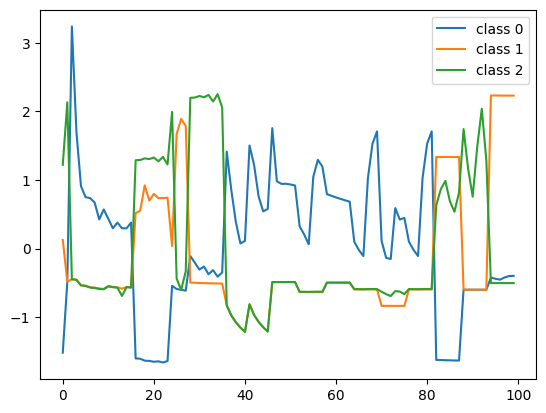

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
metricas_scoring = {
    "Accuracy": "accuracy",
    "Precision": "precision_weighted",
    "Recall": "recall_weighted",
    "F1-Score": "f1_weighted"
}

all_scores_cv = {nome_metrica: {} for nome_metrica in metricas_scoring.keys()}

In [ ]:
y_train_lstm = y_train.copy()
y_test_lstm = y_test.copy()
x_train_lstm = x_train.copy()
x_test_lstm = x_test.copy()

In [ ]:
x_train_lstm = x_train_lstm.reshape((x_train_lstm.shape[0], x_train_lstm.shape[1], 1))
x_test_lstm = x_test_lstm.reshape((x_test_lstm.shape[0], x_test_lstm.shape[1], 1))

In [ ]:
def make_model(input_shape, dropout_rate=0.5):
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv1 = keras.layers.Dropout(rate=dropout_rate)(conv1)

  conv2 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv2 = keras.layers.Dropout(rate=dropout_rate)(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  gap = keras.layers.Dropout(rate=dropout_rate)(gap)

  output_layer = keras.layers.Dense(num_classes, activation="sigmoid")(gap)

  return keras.models.Model(inputs=input_layer, outputs=output_layer)


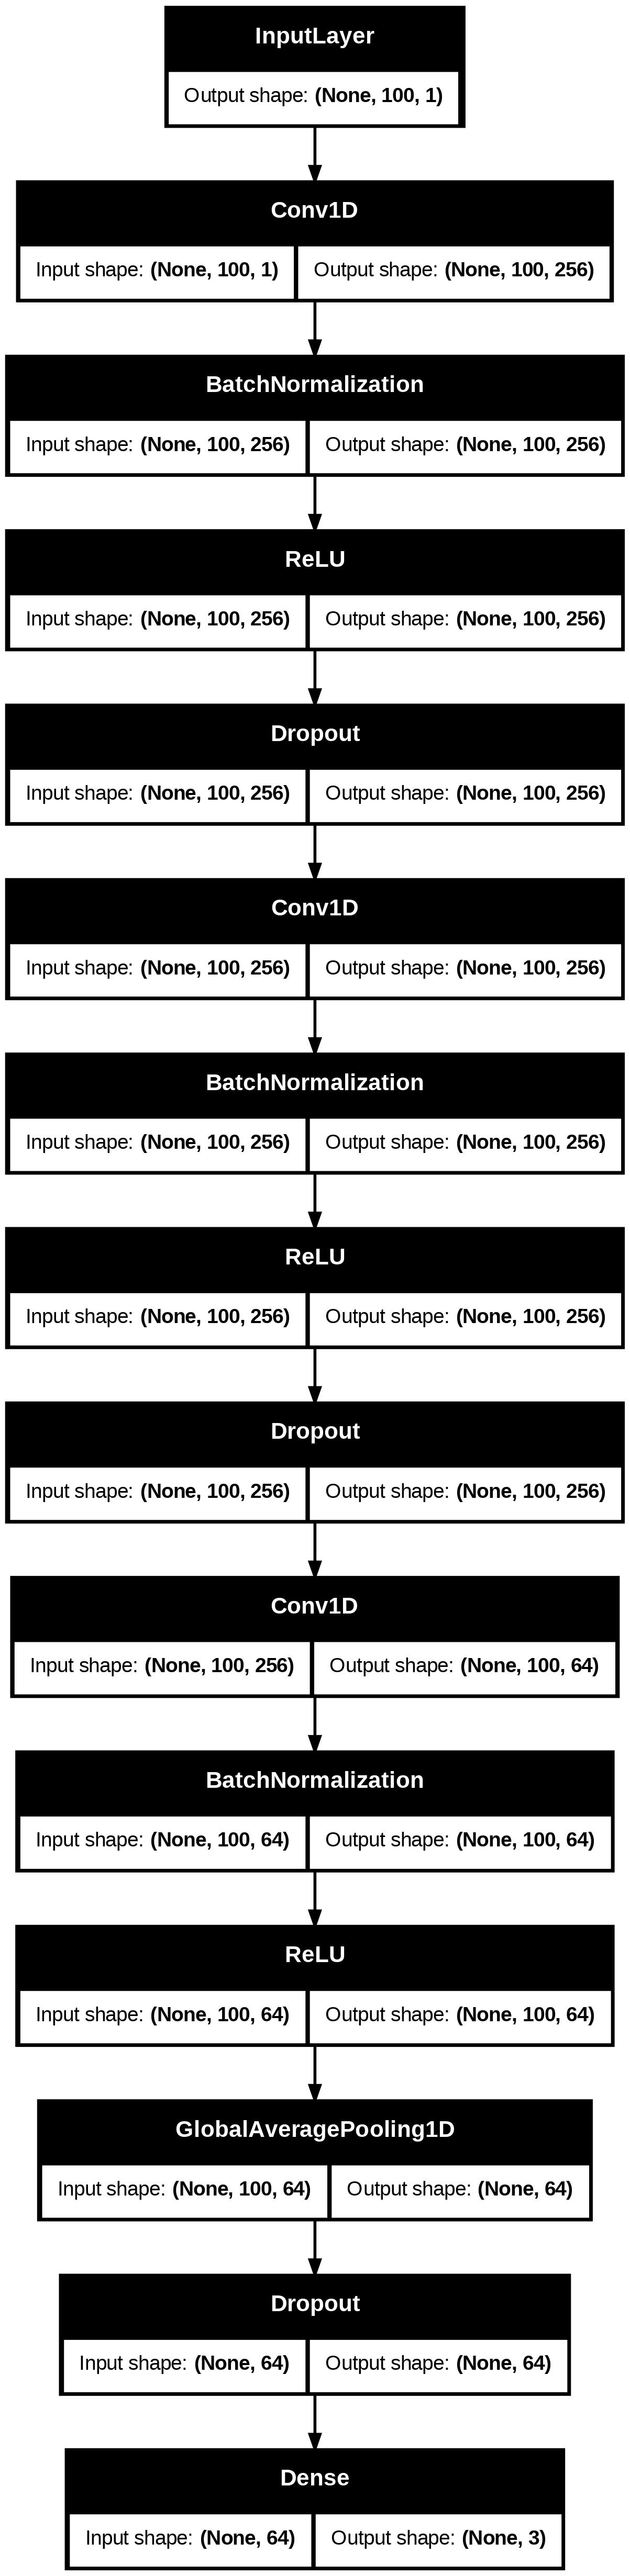

In [ ]:
model = make_model(input_shape=x_train_lstm.shape[1:])

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
n_folds = 10
epochs = 50
batch_size = 32

In [ ]:
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
loss_per_fold = []

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=30, min_lr=0.0005
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", mode='min', patience=30, restore_best_weights=True, verbose=1),
]

In [ ]:
if len(y_train_lstm.shape) == 1:
    y_train_lstm = np.expand_dims(y_train_lstm, axis=-1)

if len(y_test_lstm.shape) == 1:
    y_test_lstm = np.expand_dims(y_test_lstm, axis=-1)

print(f"Novo shape de y_train: {y_train_lstm.shape}")


Novo shape de y_train: (13197, 1)


In [ ]:
from tqdm import tqdm

In [ ]:
fold_no = 1
for train_index, val_index in tqdm(kf.split(x_train_lstm, y_train_lstm)):
    print(f'----------------- Fold {fold_no}/{n_folds} -----------------')

    # divide os dados em conjuntos de treino e validação para o fold atual
    X_train_fold, X_val_fold = x_train_lstm[train_index], y_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    model = make_model(input_shape=x_train_lstm.shape[1:])

    model.compile(
      optimizer='adam',
      loss="sparse_categorical_crossentropy",
      metrics=[
          SparseCategoricalAccuracy(name='accuracy'),
      ],
    )

    print('Treinando...')
    history = model.fit(
      x_train_lstm,
      y_train_lstm,
      batch_size=batch_size,
      epochs=epochs,
      callbacks=callbacks,
      validation_split=0.2,
      verbose=1,
    )
    print('Avaliando performance...')
    loss, accuracy_val = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    y_pred_probs = model.predict(X_val_fold)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels = np.squeeze(Y_val_fold)

    print(f'Loss: {loss:.4f}, Accuracy: {accuracy_val:.4f}')

    fold_no += 1


0it [00:00, ?it/s]

----------------- Fold 1/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7242 - loss: 0.6276 - val_accuracy: 0.3417 - val_loss: 2.8908 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9153 - loss: 0.2535 - val_accuracy: 0.9705 - val_loss: 0.1314 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9380 - loss: 0.1803 - val_accuracy: 0.9754 - val_loss: 0.0939 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9485 - loss: 0.1476 - val_accuracy: 0.9617 - val_loss: 0.1171 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9542 - loss: 0.1294 - val_accuracy: 0.9769 - val_loss: 0.0736 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9599 - loss: 0.1181 - val_accuracy: 0.9788 - val_loss: 0.0711 - learning_rate: 0.0010
Epoch 7/50
330/330 ━━━━━━━━

1it [01:24, 84.22s/it]

Loss: 125.0792, Accuracy: 0.0000
----------------- Fold 2/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7392 - loss: 0.6010 - val_accuracy: 0.3417 - val_loss: 2.8520 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9148 - loss: 0.2612 - val_accuracy: 0.9701 - val_loss: 0.1684 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9416 - loss: 0.1748 - val_accuracy: 0.9652 - val_loss: 0.1110 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9523 - loss: 0.1488 - val_accuracy: 0.9723 - val_loss: 0.0897 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9575 - loss: 0.1270 - val_accuracy: 0.9807 - val_loss: 0.0639 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9610 - loss: 0.1165 - val_accuracy: 0.9845 - val_loss: 0.0706 - learning_rate: 0

2it [02:44, 81.62s/it]

Loss: 106.9328, Accuracy: 0.0000
----------------- Fold 3/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7229 - loss: 0.6142 - val_accuracy: 0.3417 - val_loss: 3.4162 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9008 - loss: 0.2698 - val_accuracy: 0.9375 - val_loss: 0.1919 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9401 - loss: 0.1800 - val_accuracy: 0.9784 - val_loss: 0.0859 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9496 - loss: 0.1507 - val_accuracy: 0.9818 - val_loss: 0.0752 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9557 - loss: 0.1401 - val_accuracy: 0.9723 - val_loss: 0.0791 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9603 - loss: 0.1199 - val_accuracy: 0.9784 - val_loss: 0.0615 - learning_rate: 0

3it [04:03, 80.71s/it]

Loss: 120.3221, Accuracy: 0.0000
----------------- Fold 4/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7265 - loss: 0.6162 - val_accuracy: 0.3417 - val_loss: 3.6516 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9056 - loss: 0.2720 - val_accuracy: 0.9795 - val_loss: 0.1405 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9432 - loss: 0.1797 - val_accuracy: 0.9780 - val_loss: 0.0948 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9479 - loss: 0.1510 - val_accuracy: 0.9727 - val_loss: 0.0889 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9491 - loss: 0.1393 - val_accuracy: 0.9746 - val_loss: 0.0742 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9570 - loss: 0.1181 - val_accuracy: 0.9708 - val_loss: 0.0893 - learning_rate: 0

4it [05:23, 80.24s/it]

Loss: 108.2518, Accuracy: 0.0000
----------------- Fold 5/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7128 - loss: 0.6343 - val_accuracy: 0.3417 - val_loss: 3.2182 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9142 - loss: 0.2599 - val_accuracy: 0.9742 - val_loss: 0.1437 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9400 - loss: 0.1778 - val_accuracy: 0.9777 - val_loss: 0.0926 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9486 - loss: 0.1513 - val_accuracy: 0.9784 - val_loss: 0.0756 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9554 - loss: 0.1313 - val_accuracy: 0.9811 - val_loss: 0.0673 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9597 - loss: 0.1224 - val_accuracy: 0.9504 - val_loss: 0.1239 - learning_rate: 0

5it [06:42, 79.97s/it]

Loss: 97.7546, Accuracy: 0.0000
----------------- Fold 6/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7318 - loss: 0.5984 - val_accuracy: 0.3417 - val_loss: 3.1219 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9127 - loss: 0.2619 - val_accuracy: 0.9678 - val_loss: 0.1485 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9412 - loss: 0.1741 - val_accuracy: 0.9792 - val_loss: 0.0848 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9450 - loss: 0.1488 - val_accuracy: 0.9777 - val_loss: 0.0821 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9567 - loss: 0.1245 - val_accuracy: 0.9670 - val_loss: 0.1054 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9586 - loss: 0.1171 - val_accuracy: 0.9795 - val_loss: 0.0648 - learning_rate: 0.

6it [08:02, 79.76s/it]

Loss: 127.3556, Accuracy: 0.0000
----------------- Fold 7/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7217 - loss: 0.6161 - val_accuracy: 0.3417 - val_loss: 4.0949 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8999 - loss: 0.2799 - val_accuracy: 0.9739 - val_loss: 0.1362 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9330 - loss: 0.1899 - val_accuracy: 0.9674 - val_loss: 0.1240 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9486 - loss: 0.1543 - val_accuracy: 0.9742 - val_loss: 0.0875 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9558 - loss: 0.1321 - val_accuracy: 0.9792 - val_loss: 0.0689 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9607 - loss: 0.1185 - val_accuracy: 0.9693 - val_loss: 0.0888 - learning_rate: 0

7it [09:21, 79.71s/it]

Loss: 120.7010, Accuracy: 0.0000
----------------- Fold 8/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7260 - loss: 0.5922 - val_accuracy: 0.3417 - val_loss: 3.2567 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9034 - loss: 0.2820 - val_accuracy: 0.9606 - val_loss: 0.1486 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9438 - loss: 0.1818 - val_accuracy: 0.9686 - val_loss: 0.1141 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9499 - loss: 0.1446 - val_accuracy: 0.9758 - val_loss: 0.0831 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9567 - loss: 0.1287 - val_accuracy: 0.9598 - val_loss: 0.1098 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9601 - loss: 0.1186 - val_accuracy: 0.9788 - val_loss: 0.0663 - learning_rate: 0

8it [10:42, 80.18s/it]

Loss: 142.7664, Accuracy: 0.0000
----------------- Fold 9/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7155 - loss: 0.6576 - val_accuracy: 0.3417 - val_loss: 2.0291 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9062 - loss: 0.2693 - val_accuracy: 0.9152 - val_loss: 0.1809 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9351 - loss: 0.1925 - val_accuracy: 0.9708 - val_loss: 0.1005 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9515 - loss: 0.1470 - val_accuracy: 0.9473 - val_loss: 0.1423 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9560 - loss: 0.1308 - val_accuracy: 0.9814 - val_loss: 0.0648 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9588 - loss: 0.1158 - val_accuracy: 0.9629 - val_loss: 0.1111 - learning_rate: 0

9it [12:03, 80.22s/it]

Loss: 105.1052, Accuracy: 0.0000
----------------- Fold 10/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7316 - loss: 0.6163 - val_accuracy: 0.3417 - val_loss: 3.1655 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9102 - loss: 0.2660 - val_accuracy: 0.9095 - val_loss: 0.1835 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9368 - loss: 0.1801 - val_accuracy: 0.9114 - val_loss: 0.2026 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9416 - loss: 0.1614 - val_accuracy: 0.9739 - val_loss: 0.0815 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9557 - loss: 0.1255 - val_accuracy: 0.9777 - val_loss: 0.0683 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9536 - loss: 0.1240 - val_accuracy: 0.9765 - val_loss: 0.0653 - learning_rate: 

10it [13:23, 80.31s/it]

Loss: 113.4929, Accuracy: 0.0000


In [ ]:
modelLSTM = keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(x_test_lstm, y_test_lstm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9950 - loss: 0.0274
Test accuracy 0.9945454597473145
Test loss 0.02615242451429367


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = modelLSTM.predict(x_test_lstm)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.squeeze(y_test_lstm)

report = classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)'],
    digits=4,
    zero_division=0 
)

print("\n--- Relatório de Classificação Completo ---")
print(report)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

--- Relatório de Classificação Completo ---
                      precision    recall  f1-score   support

          Benign (0)     0.9944    1.0000    0.9972      1068
   DoS-Slowloris (1)     0.9955    0.9849    0.9902      1126
DoS-SlowHTTPTest (2)     0.9901    0.9955    0.9928      1106

            accuracy                         0.9933      3300
           macro avg     0.9933    0.9935    0.9934      3300
        weighted avg     0.9933    0.9933    0.9933      3300



Scores de CV do LSTM coletados e salvos em 'all_scores_cv_teste'.


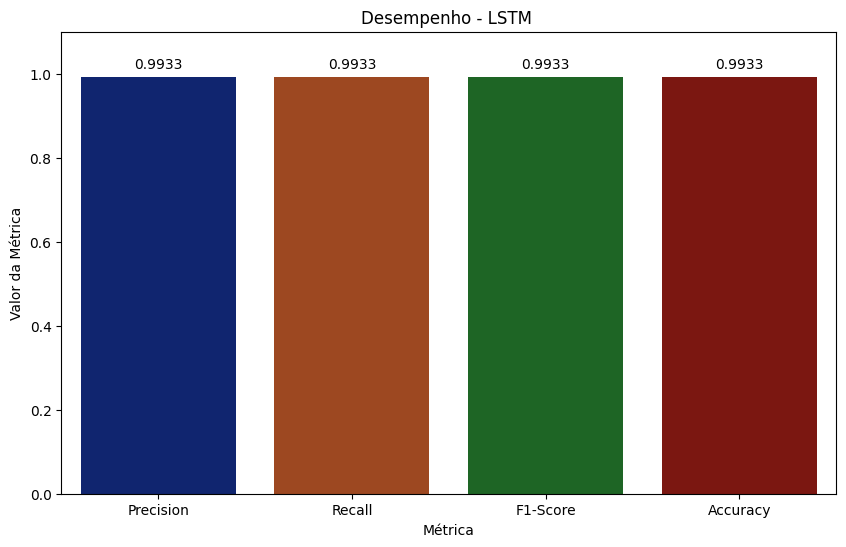

In [ ]:
precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_labels, y_pred_labels)

lstm_scores_temp = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
for nome_metrica in metricas_scoring.keys():
    scores_lstm = np.array(lstm_scores_temp[nome_metrica])
    all_scores_cv[nome_metrica]['LSTM'] = scores_lstm

print(f"Scores de CV do {'LSTM'} coletados e salvos em 'all_scores_cv_teste'.")

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}
df_metricas = pd.DataFrame(metricas)
df_metrics_lstm = df_metricas.copy()
df_metrics_lstm = df_metrics_lstm.insert(loc=0, column='Modelo', value='LSTM')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

plt.title('Desempenho - LSTM ')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.show()

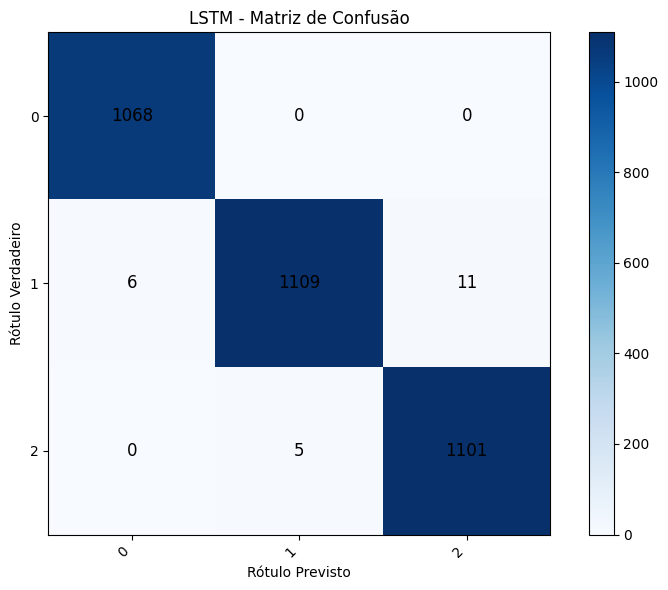

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.squeeze(y_test_lstm)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha='center', va='center',
                 color='black', fontsize=12) # Aumentei o fontsize para visibilidade

plt.title('LSTM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(classes)), labels=classes)

plt.tight_layout() # Ajusta o layout para evitar cortes nos rótulos
plt.show()

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


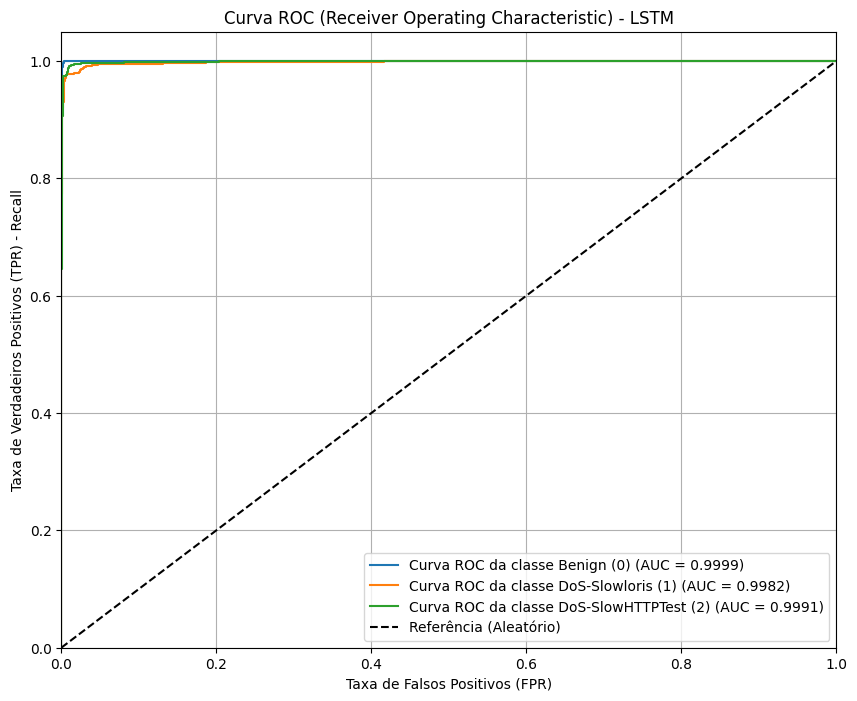

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

class_names = [0, 1, 2]
n_classes = len(class_names)

legend_names = ['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)']

y_pred_prob = model.predict(x_test_lstm) 

y_true_labels = np.squeeze(y_test_lstm)
y_test_bin = label_binarize(y_true_labels, classes=class_names)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {legend_names[i]} (AUC = {roc_auc[i]:.4f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) - Recall')
plt.title('Curva ROC (Receiver Operating Characteristic) - LSTM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Modelagem da rede neural com os hiperparâmetros configurados

modelMLP = MLPClassifier(hidden_layer_sizes=(256,),
                        max_iter = 1000,activation = 'tanh',
                        solver = 'adam',
                        learning_rate_init = 0.05, early_stopping = True,
                        verbose=True)


In [ ]:
modelMLP.fit(x_train, y_train)

Iteration 1, loss = 0.17081708
Validation score: 0.994697
Iteration 2, loss = 0.02888530
Validation score: 0.996212
Iteration 3, loss = 0.02825177
Validation score: 0.995455
Iteration 4, loss = 0.02150366
Validation score: 0.996970
Iteration 5, loss = 0.02650679
Validation score: 0.984848
Iteration 6, loss = 0.04323242
Validation score: 0.994697
Iteration 7, loss = 0.01718817
Validation score: 1.000000
Iteration 8, loss = 0.04345927
Validation score: 0.996970
Iteration 9, loss = 0.02115819
Validation score: 1.000000
Iteration 10, loss = 0.01182001
Validation score: 0.997727
Iteration 11, loss = 0.02608254
Validation score: 0.999242
Iteration 12, loss = 0.01657512
Validation score: 0.992424
Iteration 13, loss = 0.02373864
Validation score: 0.990152
Iteration 14, loss = 0.03521401
Validation score: 0.995455
Iteration 15, loss = 0.03168242
Validation score: 0.993182
Iteration 16, loss = 0.02157132
Validation score: 0.993182
Iteration 17, loss = 0.01263817
Validation score: 0.998485
Iterat

,hidden_layer_sizes,"(256,)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.05
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


In [ ]:
previsoes_algoritmos = {}

In [ ]:
previsoes_algoritmos['LSTM'] = y_pred_labels

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:

nome_modelo = "MLP"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(modelMLP, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=1, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.2s remaining:    3.5s


Scores de CV do MLP coletados e salvos em 'all_scores_cv_teste'.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished


In [ ]:
# Realizando predições
predictsMLP = modelMLP.predict(x_test)

accuracyMLP = accuracy_score(y_test, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y_test, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.9978787878787879

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9981    1.0000    0.9991      1068
           1     0.9965    0.9982    0.9973      1126
           2     0.9991    0.9955    0.9973      1106

    accuracy                         0.9979      3300
   macro avg     0.9979    0.9979    0.9979      3300
weighted avg     0.9979    0.9979    0.9979      3300



In [ ]:
print(f'Scores validação cruzada MLP: {scores}')
print(f'Média dos scores: {scores.mean()}')
print(f'Desvio padrão dos scores: {scores.std()}')

Scores validação cruzada MLP: [0.9981818  0.99697296 0.99878787 0.99818182 0.99757575 0.99515145
 0.99939394 0.99757426 0.99514581 0.99818071]
Média dos scores: 0.997514638121278
Desvio padrão dos scores: 0.0013410257883440825


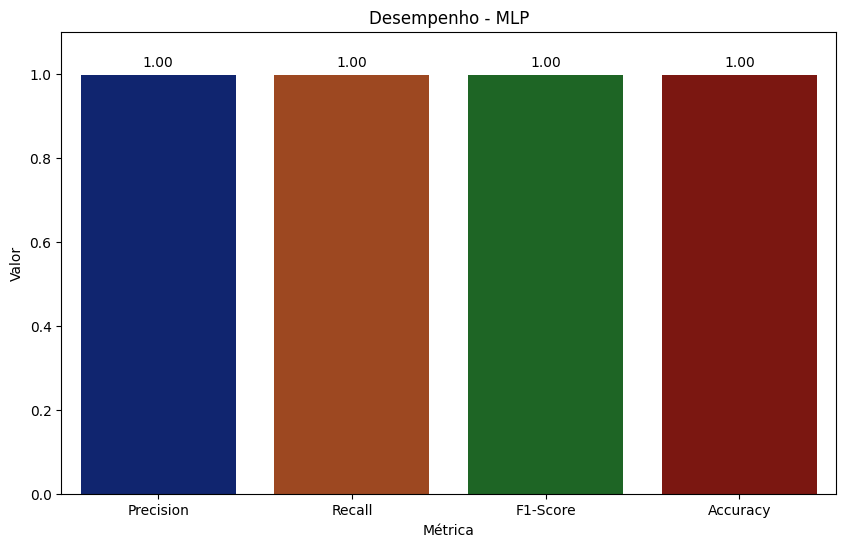

In [ ]:
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_mlp = df_metricas.copy()
df_metrics_mlp.insert(loc=0, column='Modelo', value='MLP')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt # Importe para customizar o gráfico
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

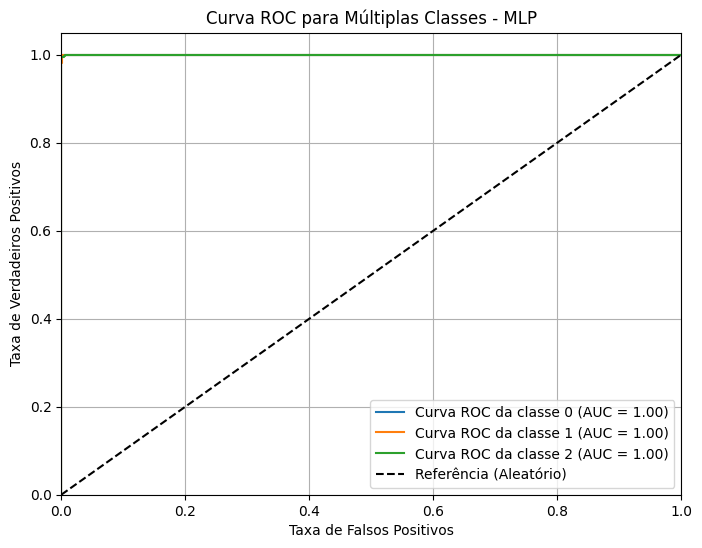

In [ ]:
class_names = modelMLP.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
previsoes_algoritmos['MLP'] = y_pred

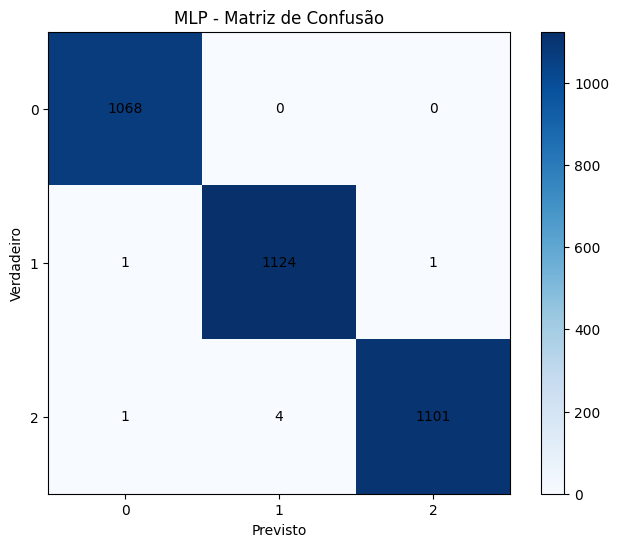

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

nome_modelo = "Naive Bayes"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(nb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)
    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

scores_nb = scores



Scores de CV do Naive Bayes coletados e salvos em 'all_scores_cv_teste'.


In [ ]:
print(f'Scores validação cruzada MLP: {scores_nb}')
print(f'Média dos scores: {scores_nb.mean()}')
print(f'Desvio padrão dos scores: {scores_nb.std()}')

Scores validação cruzada MLP: [0.94063849 0.93773972 0.93978036 0.94352184 0.94415733 0.94355143
 0.93496245 0.93292185 0.93866097 0.93735655]
Média dos scores: 0.9393290988720476
Desvio padrão dos scores: 0.0035724095701509606


In [ ]:
# Prever os rótulos para os dados de teste
predictsNB = nb.predict(x_test)

accuracyNB = accuracy_score(y_test, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y_test, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.9445454545454546

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9736    1.0000    0.9866      1068
           1     0.9877    0.8579    0.9183      1126
           2     0.8841    0.9792    0.9292      1106

    accuracy                         0.9445      3300
   macro avg     0.9485    0.9457    0.9447      3300
weighted avg     0.9484    0.9445    0.9440      3300



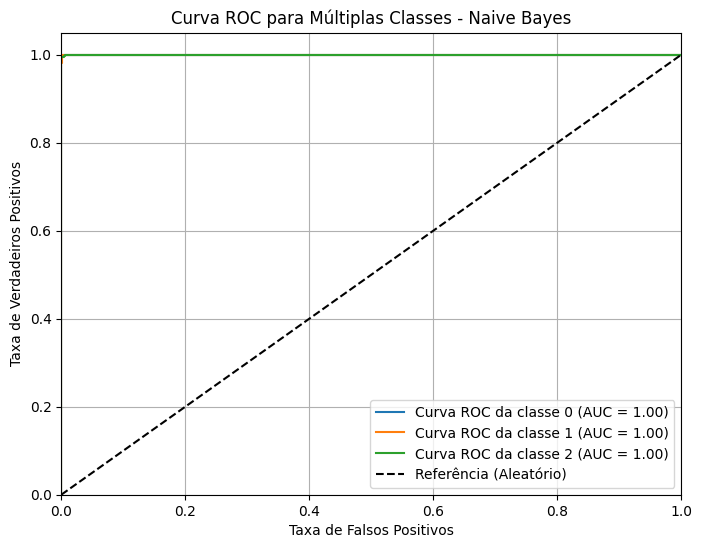

In [ ]:
class_names = nb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

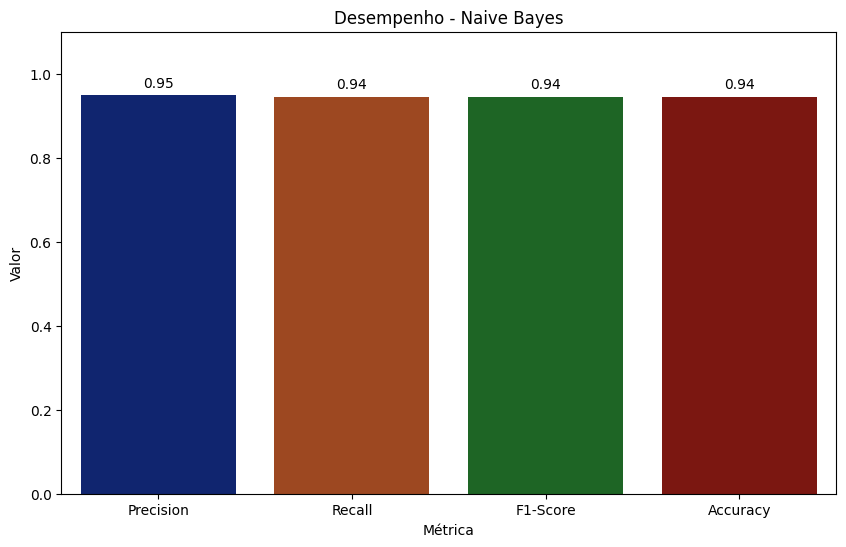

In [ ]:
# Calcular as métricas
y_pred = predictsNB
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_nb = df_metricas.copy()
df_metrics_nb.insert(loc=0, column='Modelo', value='Naive Bayes')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

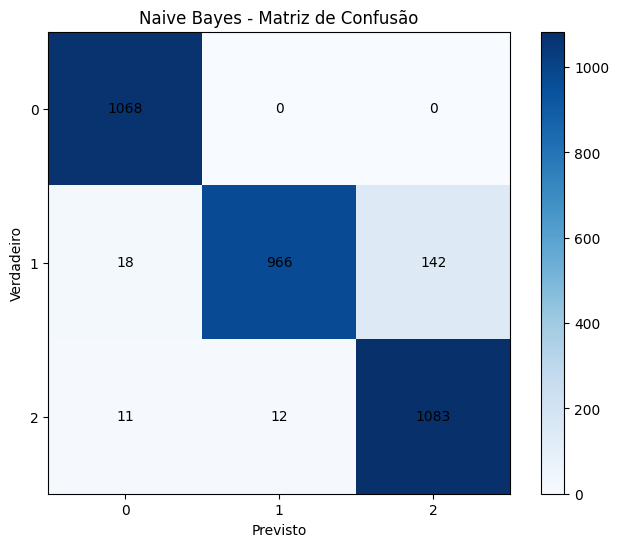

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Naive Bayes - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
previsoes_algoritmos['Naive Bayes'] = y_pred

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Modelagem e escolha dos hiperparâmetros do algoritmo de Decision Tree
modelDT = DecisionTreeClassifier(
  criterion='entropy',
  max_depth=10,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=None
)

# Treinando o modelo
modelDT.fit(x_train, y_train)

nome_modelo = "Decision Tree"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelDT, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

scores_DT = scores
print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

print(f'Scores validação cruzada MLP: {scores_DT}')
print(f'Média dos scores: {scores_DT.mean()}')
print(f'Desvio padrão dos scores: {scores_DT.std()}')


Scores de CV do Decision Tree coletados e salvos em 'all_scores_cv_teste'.
Scores validação cruzada MLP: [0.99939394 1.         0.99878787 0.99939394 1.         1.
 0.99878787 1.         0.99878714 1.        ]
Média dos scores: 0.9995150769062928
Desvio padrão dos scores: 0.0005284540070452816


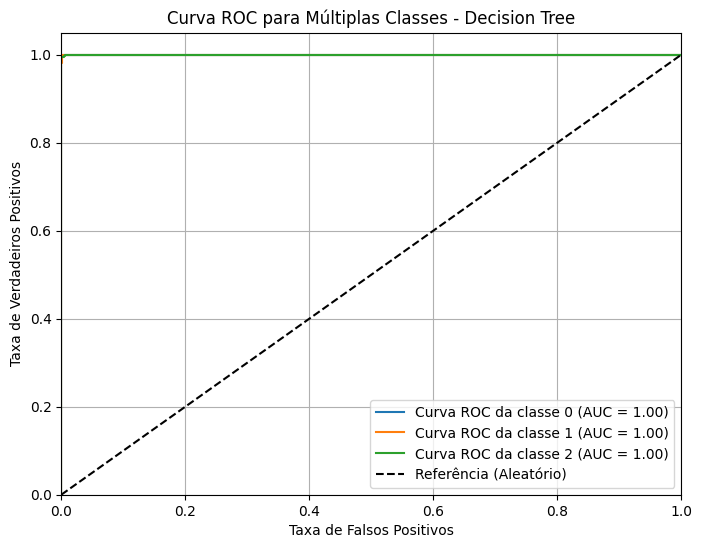

In [ ]:
class_names = modelDT.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Realizando predições
predictsDT = modelDT.predict(x_test)

accuracyDT = accuracy_score(y_test, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y_test, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.9984848484848485

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9991    0.9981    0.9986      1068
           1     0.9982    0.9973    0.9978      1126
           2     0.9982    1.0000    0.9991      1106

    accuracy                         0.9985      3300
   macro avg     0.9985    0.9985    0.9985      3300
weighted avg     0.9985    0.9985    0.9985      3300



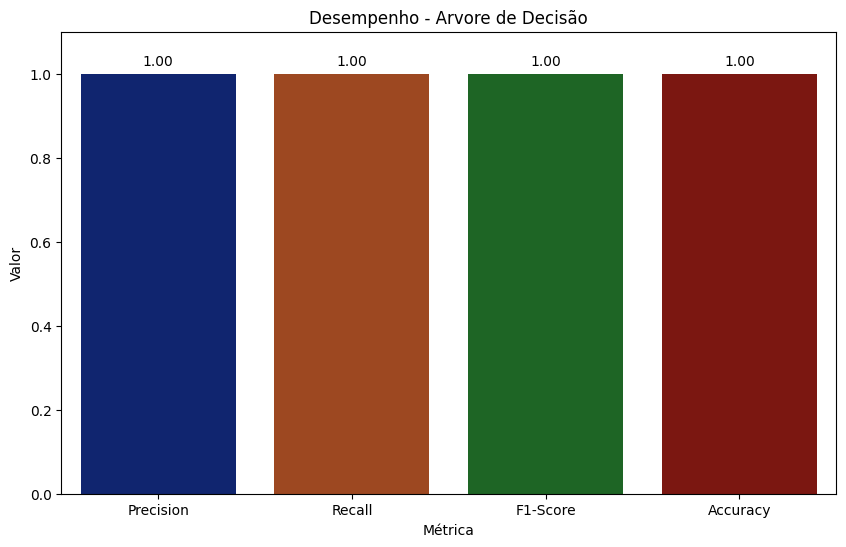

In [ ]:
# Calcular as métricas
y_pred = predictsDT
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_dt = df_metricas.copy()
df_metrics_dt.insert(loc=0, column='Modelo', value='Arvore de Decisão')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
previsoes_algoritmos['Arvore de Decisão'] = y_pred

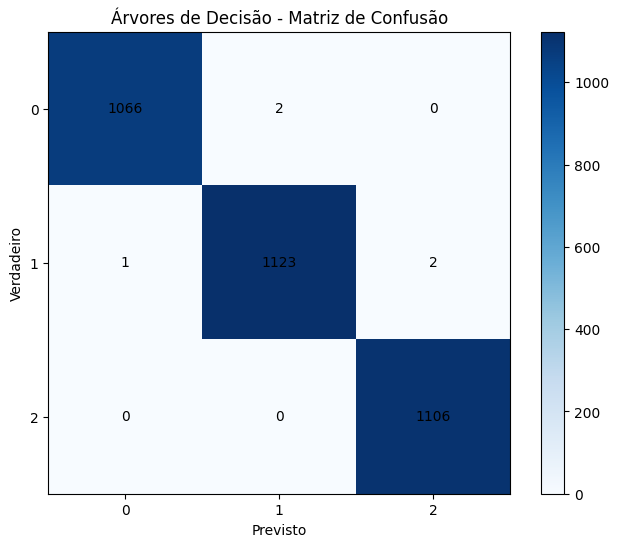

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Árvores de Decisão - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(
  n_estimators=100,
  criterion='entropy',
  min_samples_split=2,
  min_samples_leaf=1,
  random_state=42
)

modelRF.fit(x_train, y_train)

nome_modelo = "Random Forest"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(modelRF, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_RF = scores
print(f'Scores validação cruzada MLP: {scores_RF}')
print(f'Média dos scores: {scores_RF.mean()}')
print(f'Desvio padrão dos scores: {scores_RF.std()}')



Scores validação cruzada MLP: [0.99939394 1.         1.         0.99939394 1.         1.
 1.         1.         1.         1.        ]
Média dos scores: 0.9998787877786125
Desvio padrão dos scores: 0.0002424244427750022


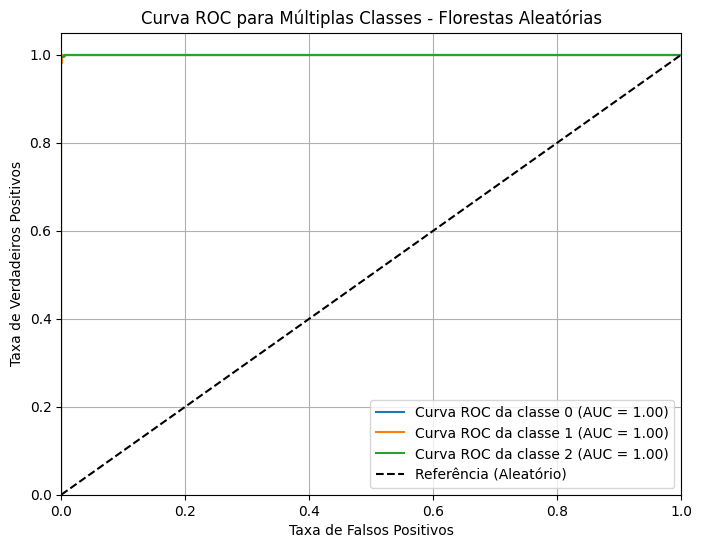

In [ ]:
class_names = modelRF.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Florestas Aleatórias')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Realizando predições
predictsRF = modelRF.predict(x_test)

accuracyRF = accuracy_score(y_test, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y_test, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.9993939393939394

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9991    1.0000    0.9995      1068
           1     1.0000    0.9982    0.9991      1126
           2     0.9991    1.0000    0.9995      1106

    accuracy                         0.9994      3300
   macro avg     0.9994    0.9994    0.9994      3300
weighted avg     0.9994    0.9994    0.9994      3300



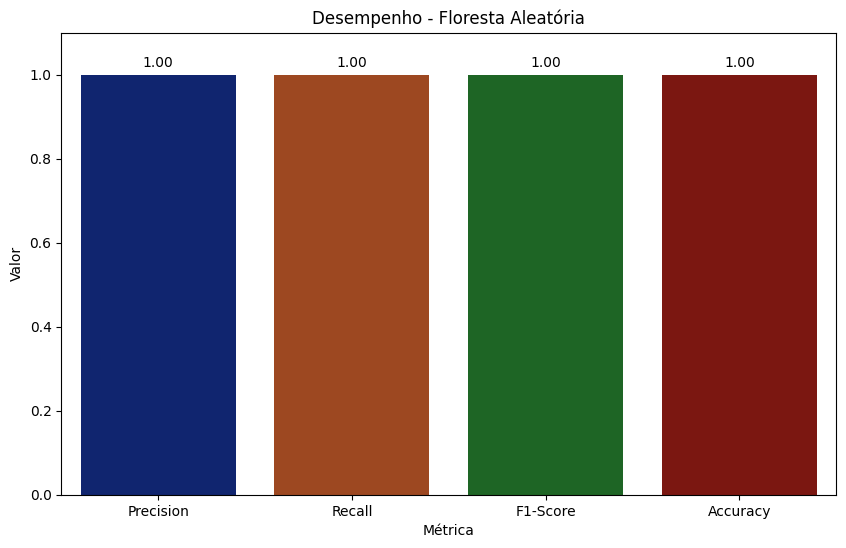

In [ ]:
y_pred = predictsRF
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_rf = df_metricas.copy()
df_metrics_rf.insert(loc=0, column='Modelo', value='Floresta Aleatória')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Floresta Aleatória')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
previsoes_algoritmos['Floresta Aleatória'] = y_pred

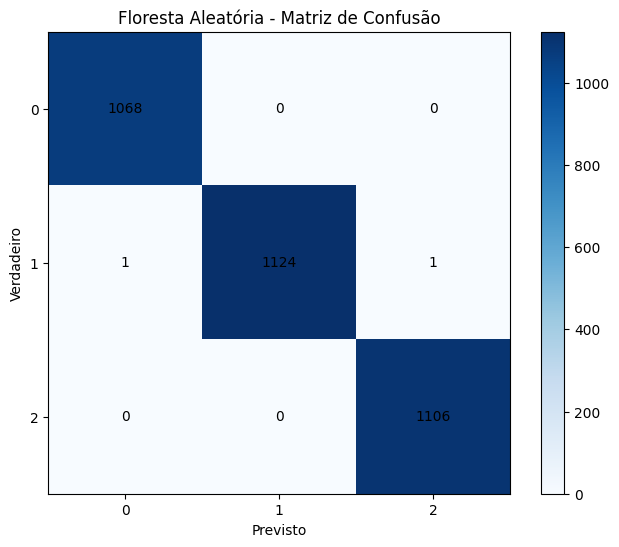

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Floresta Aleatória - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.svm import SVC

# Criar e treinar o classificador SVM
svm = SVC(kernel='rbf', probability=True, random_state=42, verbose=True)

svm.fit(x_train, y_train)

nome_modelo = "SVM"
X_dados = x 
Y_dados = y 
for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(svm, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_SVM = scores



[LibSVM]

In [ ]:
print(f'Scores validação cruzada SVM: {scores_SVM}')
print(f'Média dos scores: {scores_SVM.mean()}')
print(f'Desvio padrão dos scores: {scores_SVM.std()}')

Scores validação cruzada SVM: [0.99211731 0.99393715 0.99150616 0.99696859 0.99636364 0.99089891
 0.98908593 0.99150223 0.98846902 0.99150613]
Média dos scores: 0.992235506541757
Desvio padrão dos scores: 0.0026428675113792707


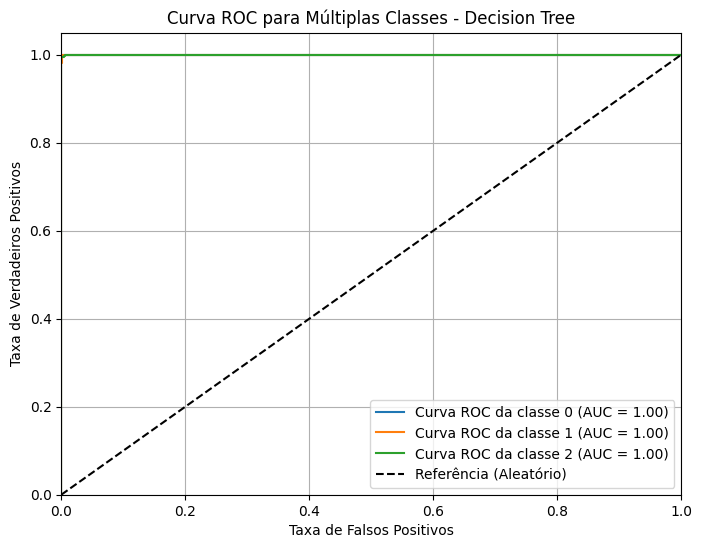

In [ ]:
class_names = svm.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Prever os rótulos para os dados de teste
predictsSVM = svm.predict(x_test)

accuracySVM = accuracy_score(y_test, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')

reportSVM = classification_report(y_test, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.9893939393939394

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9963    1.0000    0.9981      1068
           1     0.9875    0.9813    0.9844      1126
           2     0.9847    0.9873    0.9860      1106

    accuracy                         0.9894      3300
   macro avg     0.9895    0.9896    0.9895      3300
weighted avg     0.9894    0.9894    0.9894      3300



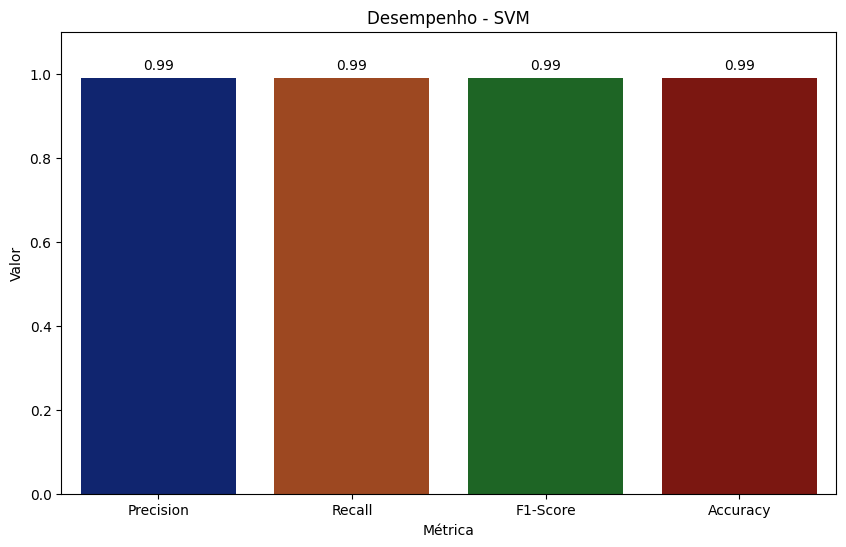

In [ ]:
# Calcular as métricas
y_pred = predictsSVM
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_svm = df_metricas.copy()
df_metrics_svm.insert(loc=0, column='Modelo', value='SVM')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
previsoes_algoritmos['SVM'] = y_pred

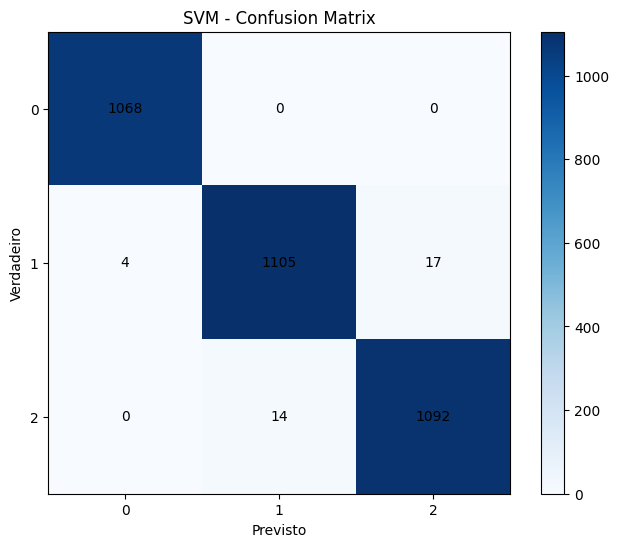

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
# AdaBoost Algoritmo
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
adb.fit(x_train, y_train)

nome_modelo = "AdaBoost"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(adb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_adb = scores


print(f'Scores validação cruzada adaBoost: {scores_adb}')
print(f'Média dos scores: {scores_adb.mean()}')
print(f'Desvio padrão dos scores: {scores_adb.std()}')

Scores validação cruzada adaBoost: [0.99818182 1.         0.99939394 0.99697185 0.99939394 0.99090159
 0.99818291 0.99757591 0.99818072 0.99757428]
Média dos scores: 0.9976356955037404
Desvio padrão dos scores: 0.0024179269013205646


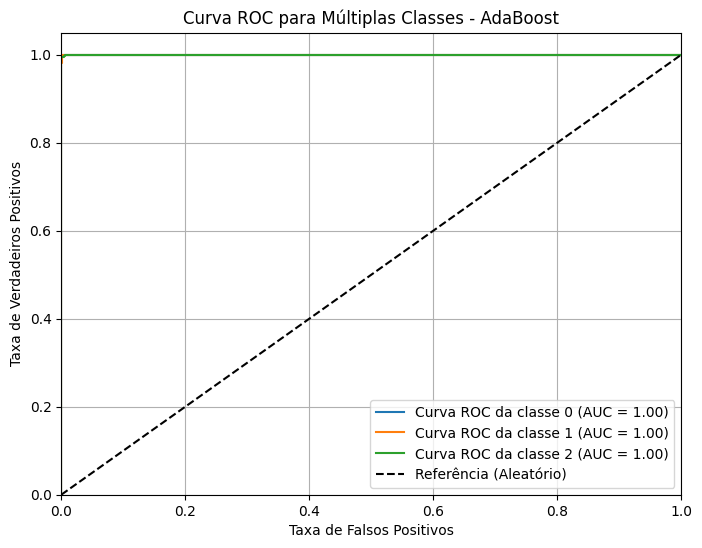

In [ ]:
class_names = adb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictions_adb = adb.predict(x_test)
print(classification_report(y_test, predictions_adb))
accuracyadb = accuracy_score(y_test, predictions_adb)
print(f'Precisão do modelo de AdaBoost: {accuracyadb}')
reportadb = classification_report(y_test, predictions_adb, digits=4)
print(f'\nRelatório de Classificação:\n{reportadb}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00      1126
           2       1.00      1.00      1.00      1106

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Precisão do modelo de AdaBoost: 0.9987878787878788

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9981    1.0000    0.9991      1068
           1     0.9982    0.9982    0.9982      1126
           2     1.0000    0.9982    0.9991      1106

    accuracy                         0.9988      3300
   macro avg     0.9988    0.9988    0.9988      3300
weighted avg     0.9988    0.9988    0.9988      3300



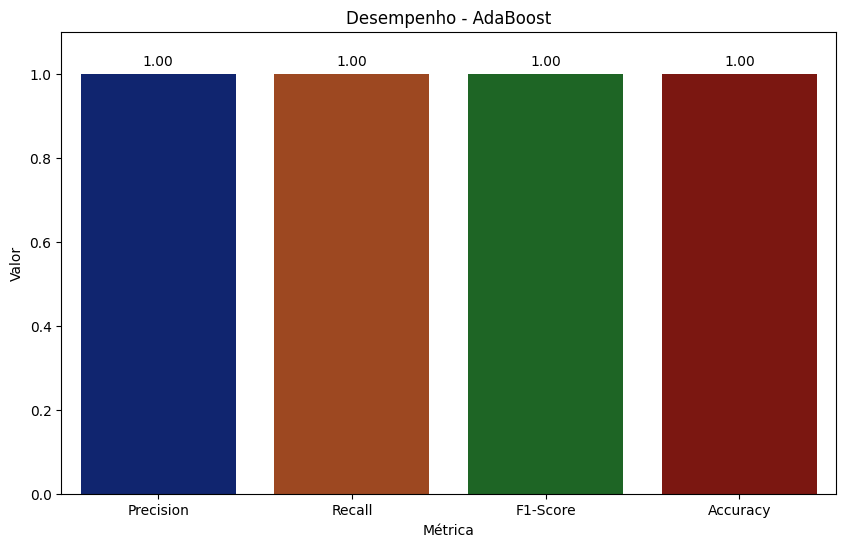

In [ ]:
# Calcular as métricas
y_pred = predictions_adb
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_adb = df_metricas.copy()
df_metrics_adb.insert(loc=0, column='Modelo', value='AdaBoost')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - AdaBoost')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
previsoes_algoritmos['AdaBoost'] = y_pred

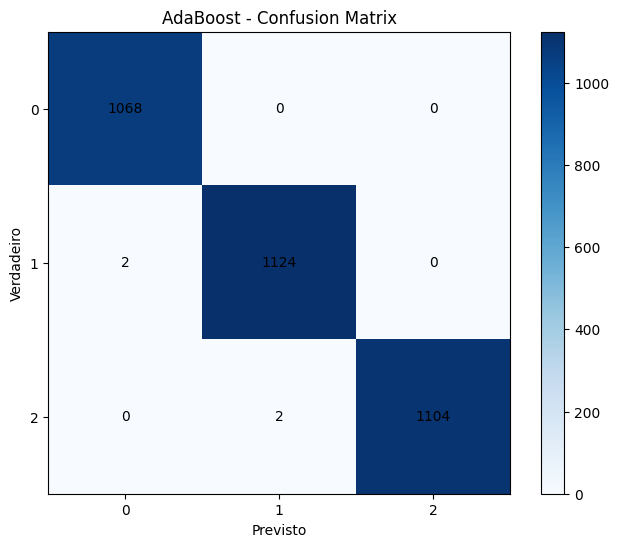

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('AdaBoost - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
def create_dataset(data, look_back=1):
   X, y = [], []
   for i in range(len(data)-look_back-1):
       a = data[i:(i+look_back), 0]
       X.append(a)
       y.append(data[i + look_back, 0])
   return np.array(X), np.array(y)


look_back = 10
X, y = create_dataset(x, look_back)

In [ ]:
X_gru = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
scaler_ts = StandardScaler()
scaler_ts.fit(x[:, 0].reshape(-1, 1))

,copy,True
,with_mean,True
,with_std,True


In [ ]:
# modelo GRU
model_gru_ts = Sequential()
model_gru_ts.add(GRU(50, return_sequences= True , input_shape=(look_back, 1 )))
model_gru_ts.add(GRU(50))
model_gru_ts.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_gru_ts.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_gru_ts.fit(X_gru, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2333
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1984
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1954
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2027
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1992
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1996
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1952
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2042
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1904
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1928
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1916
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1879
Epoch 13/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1850
Epoch 14/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1891
Epoch 15/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
predictions = model_gru_ts.predict(X)

predictions = scaler_ts.inverse_transform(predictions)
y_actual = scaler_ts.inverse_transform([y])

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

def make_gru_model(input_shape, num_classes, dropout_rate=0.5):
    model = Sequential()
    model.add(GRU(units=128,
                  input_shape=input_shape,
                  return_sequences=False,
                  implementation=2, unroll=True)) 

    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    return model


model_gru_name = "GRU"
n_folds = 10

gru_scores_temp = {nome_metrica: [] for nome_metrica in metricas_scoring.keys()}
input_shape = x_train_lstm.shape[1:]

for fold_no, (train_index, val_index) in enumerate(tqdm(kf.split(x_train_lstm, y_train_lstm), total=n_folds, desc=f"Folds do {model_gru_name}")):
    X_train_fold, X_val_fold = x_train_lstm[train_index], x_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    model_gru = make_gru_model(input_shape, num_classes)

    model_gru.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy'],
    )

    model_gru.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=32, verbose=1)

    y_pred_probs = model_gru.predict(X_val_fold, verbose=0)
    y_pred_labels = np.argmax(y_pred_probs, axis=1) 
    y_true_labels = np.squeeze(Y_val_fold) 

    gru_scores_temp['Accuracy'].append(accuracy_score(y_true_labels, y_pred_labels))
    gru_scores_temp['Precision'].append(precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['Recall'].append(recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['F1-Score'].append(f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))


for nome_metrica in metricas_scoring.keys():
    all_scores_cv[nome_metrica][model_gru_name] = np.array(gru_scores_temp[nome_metrica])

print("\nValidação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.")

modelGRU_final = make_gru_model(input_shape, num_classes)
modelGRU_final.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

print("\nTreinando modelo GRU final...")
modelGRU_final.fit(x_train_lstm, y_train_lstm, epochs=50, batch_size=32, callbacks=callbacks, validation_split=0.2, verbose=0)

test_loss_gru, test_acc_gru = modelGRU_final.evaluate(x_test_lstm, y_test_lstm, verbose=0)
print(f"Acurácia final do GRU no teste: {test_acc_gru:.4f}")

modelGRU_final.save('best_model_gru.keras')
modelGRU = modelGRU_final # Atribuindo o modelo final a uma variável padrão

y_pred_probs_gru = modelGRU.predict(x_test_lstm)
y_pred_gru = np.argmax(y_pred_probs_gru, axis=1)
previsoes_algoritmos['GRU'] = y_pred_gru

print("Modelo GRU final treinado e salvo como 'modelGRU'.")



---------------------------------------------
INICIANDO VALIDAÇÃO CRUZADA MANUAL PARA GRU
---------------------------------------------


Folds do GRU:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 162s 315ms/step - accuracy: 0.7749 - loss: 0.5069
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9428 - loss: 0.1705
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9553 - loss: 0.1358
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9579 - loss: 0.1198
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9691 - loss: 0.0898
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9763 - loss: 0.0738
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9727 - loss: 0.0902
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9841 - loss: 0.0549
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9857 - loss: 0.0480
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9845 - loss: 0.0548
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9744 - loss: 0.0777
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accu

Folds do GRU:  10%|█         | 1/10 [05:07<46:07, 307.54s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 163s 317ms/step - accuracy: 0.7732 - loss: 0.5072
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9437 - loss: 0.1631
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9546 - loss: 0.1312
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9726 - loss: 0.0990
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9721 - loss: 0.0885
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9787 - loss: 0.0784
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0593
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9808 - loss: 0.0633
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9849 - loss: 0.0497
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9857 - loss: 0.0432
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9839 - loss: 0.0448
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accu

Folds do GRU:  20%|██        | 2/10 [10:04<40:10, 301.27s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 160s 309ms/step - accuracy: 0.7677 - loss: 0.5213
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9417 - loss: 0.1687
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9577 - loss: 0.1377
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9666 - loss: 0.1095
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9739 - loss: 0.0797
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9725 - loss: 0.0848
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9757 - loss: 0.0694
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9792 - loss: 0.0677
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9767 - loss: 0.0688
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9791 - loss: 0.0584
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9759 - loss: 0.0727
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accu

Folds do GRU:  30%|███       | 3/10 [14:57<34:41, 297.35s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 161s 309ms/step - accuracy: 0.7698 - loss: 0.5152
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9444 - loss: 0.1596
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9610 - loss: 0.1283
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9672 - loss: 0.1027
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9716 - loss: 0.0869
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9807 - loss: 0.0689
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9810 - loss: 0.0569
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9823 - loss: 0.0661
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9845 - loss: 0.0531
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9867 - loss: 0.0398
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9876 - loss: 0.0418
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accu

Folds do GRU:  40%|████      | 4/10 [19:55<29:45, 297.60s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 162s 313ms/step - accuracy: 0.7701 - loss: 0.5102
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9456 - loss: 0.1609
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9593 - loss: 0.1345
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9661 - loss: 0.1100
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9727 - loss: 0.0896
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9743 - loss: 0.0800
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9745 - loss: 0.0760
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9850 - loss: 0.0487
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9824 - loss: 0.0572
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9875 - loss: 0.0401
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9810 - loss: 0.0571
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accu

Folds do GRU:  50%|█████     | 5/10 [24:52<24:47, 297.55s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 161s 312ms/step - accuracy: 0.7836 - loss: 0.4783
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9491 - loss: 0.1614
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9576 - loss: 0.1295
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9688 - loss: 0.1060
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9740 - loss: 0.0983
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9779 - loss: 0.0751
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9748 - loss: 0.0822
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9730 - loss: 0.0865
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9756 - loss: 0.0829
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9849 - loss: 0.0529
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9867 - loss: 0.0424
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accu

Folds do GRU:  60%|██████    | 6/10 [29:53<19:54, 298.61s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 164s 319ms/step - accuracy: 0.7750 - loss: 0.5193
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9477 - loss: 0.1584
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9590 - loss: 0.1265
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9663 - loss: 0.1023
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9602 - loss: 0.1209
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9687 - loss: 0.0967
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9793 - loss: 0.0699
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9786 - loss: 0.0646
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9838 - loss: 0.0532
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9817 - loss: 0.0595
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9904 - loss: 0.0368
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accu

Folds do GRU:  70%|███████   | 7/10 [34:54<14:57, 299.33s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 127s 221ms/step - accuracy: 0.7636 - loss: 0.5325
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9468 - loss: 0.1571
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9534 - loss: 0.1422
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9588 - loss: 0.1256
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9694 - loss: 0.1036
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9781 - loss: 0.0797
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9790 - loss: 0.0710
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9842 - loss: 0.0492
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9838 - loss: 0.0541
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9874 - loss: 0.0401
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9843 - loss: 0.0524
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accu

Folds do GRU:  80%|████████  | 8/10 [39:19<09:36, 288.40s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 130s 221ms/step - accuracy: 0.7971 - loss: 0.4675
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9485 - loss: 0.1517
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9536 - loss: 0.1391
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9651 - loss: 0.1135
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9647 - loss: 0.1098
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9761 - loss: 0.0744
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9795 - loss: 0.0650
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9829 - loss: 0.0582
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.0581
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9843 - loss: 0.0513
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9882 - loss: 0.0387
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accu

Folds do GRU:  90%|█████████ | 9/10 [43:46<04:41, 281.94s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 126s 216ms/step - accuracy: 0.7996 - loss: 0.4775
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9372 - loss: 0.1716
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9470 - loss: 0.1504
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9568 - loss: 0.1267
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9562 - loss: 0.1240
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9592 - loss: 0.1145
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9692 - loss: 0.0919
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9709 - loss: 0.0836
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9753 - loss: 0.0815
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.0618
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9842 - loss: 0.0550
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accu

Folds do GRU: 100%|██████████| 10/10 [48:09<00:00, 288.97s/it]
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Validação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.

Treinando modelo GRU final...
Restoring model weights from the end of the best epoch: 43.
Acurácia final do GRU no teste: 0.9964
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step
Modelo GRU final treinado e salvo como 'modelGRU'.


In [ ]:
dt_test = pd.DataFrame(all_scores_cv)
dt_test.head()

,Accuracy,Precision,Recall,F1-Score
Decision Tree,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9987889787163835, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9987878787878788, 1.0, ...","[0.9993939388930625, 1.0, 0.9987878747808532, ..."
Random Forest,"[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993950393224441, 1.0, 1.0, 0.9993950393224...","[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993939388930625, 1.0, 1.0, 0.9993939388930..."
SVM,"[0.9921212121212121, 0.9939393939393939, 0.991...","[0.9921210635741816, 0.9939480809046027, 0.991...","[0.9921212121212121, 0.9939393939393939, 0.991...","[0.9921173137410616, 0.9939371459103333, 0.991..."
AdaBoost,"[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981851179673322, 1.0, 0.9993950393224441, ...","[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981818151738193, 1.0, 0.9993939388930625, ..."
GRU,"[0.9977272727272727, 0.9992424242424243, 0.996...","[0.9977275292372517, 0.9992440747342709, 0.996...","[0.9977272727272727, 0.9992424242424243, 0.996...","[0.9977265224093396, 0.999242396351586, 0.9962..."


In [136]:
previsoes_df = pd.DataFrame(previsoes_algoritmos)
previsoes_df.tail()

,LSTM,MLP,Naive Bayes,Arvore de Decisão,Floresta Aleatória,SVM,AdaBoost,GRU
3295,0,0,0,0,0,0,0,0
3296,0,0,0,0,0,0,0,0
3297,0,0,0,0,0,0,0,0
3298,1,1,1,1,1,1,1,1
3299,2,2,2,2,2,2,2,2


In [138]:
df_metrics_adb.head()

,Modelo,Métrica,Valor
0,AdaBoost,Precision,0.998789
1,AdaBoost,Recall,0.998788
2,AdaBoost,F1-Score,0.998788
3,AdaBoost,Accuracy,0.998788


In [140]:
all_metrics_algorithm = pd.concat([df_metrics_lstm,df_metrics_mlp,df_metrics_dt, df_metrics_rf, df_metrics_svm, df_metrics_adb])
all_metrics_algorithm.head()

,Modelo,Métrica,Valor
0,MLP,Precision,0.997881
1,MLP,Recall,0.997879
2,MLP,F1-Score,0.997878
3,MLP,Accuracy,0.997879
0,Arvore de Decisão,Precision,0.998485


In [141]:
data_metrics = all_metrics_algorithm.reset_index(drop=True)

In [ ]:
data_metrics.to_csv('/poseiddon/GROUP A/CONFIGURATION 2/metricas_algoritmos.csv')
previsoes_df.to_csv('/poseiddon/GROUP A/CONFIGURATION 2/previsoes_algoritmos.csv')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Modelos que você já treinou
modelos = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

scores_f1_por_algoritmo = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

In [145]:
data_score = pd.DataFrame(all_scores_cv)
data_score.head()

,Accuracy,Precision,Recall,F1-Score
LSTM,0.9933333333333333,0.9933451551839287,0.9933333333333333,0.9933245805781942
MLP,"[0.996969696969697, 0.9975757575757576, 0.9975...","[0.9981916817359855, 0.9969740605979124, 1.0, ...","[0.9981818181818182, 0.9933333333333333, 1.0, ...","[0.9981818046580513, 0.9969729628042077, 0.998..."
Naive Bayes,"[0.9412121212121212, 0.9387878787878788, 0.940...","[0.945960808346787, 0.9437625394780749, 0.9450...","[0.9412121212121212, 0.9387878787878788, 0.940...","[0.9406384901598578, 0.9377397176820587, 0.939..."
Decision Tree,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9987889787163835, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9987878787878788, 1.0, ...","[0.9993939388930625, 1.0, 0.9987878747808532, ..."
Random Forest,"[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993950393224441, 1.0, 1.0, 0.9993950393224...","[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993939388930625, 1.0, 1.0, 0.9993939388930..."


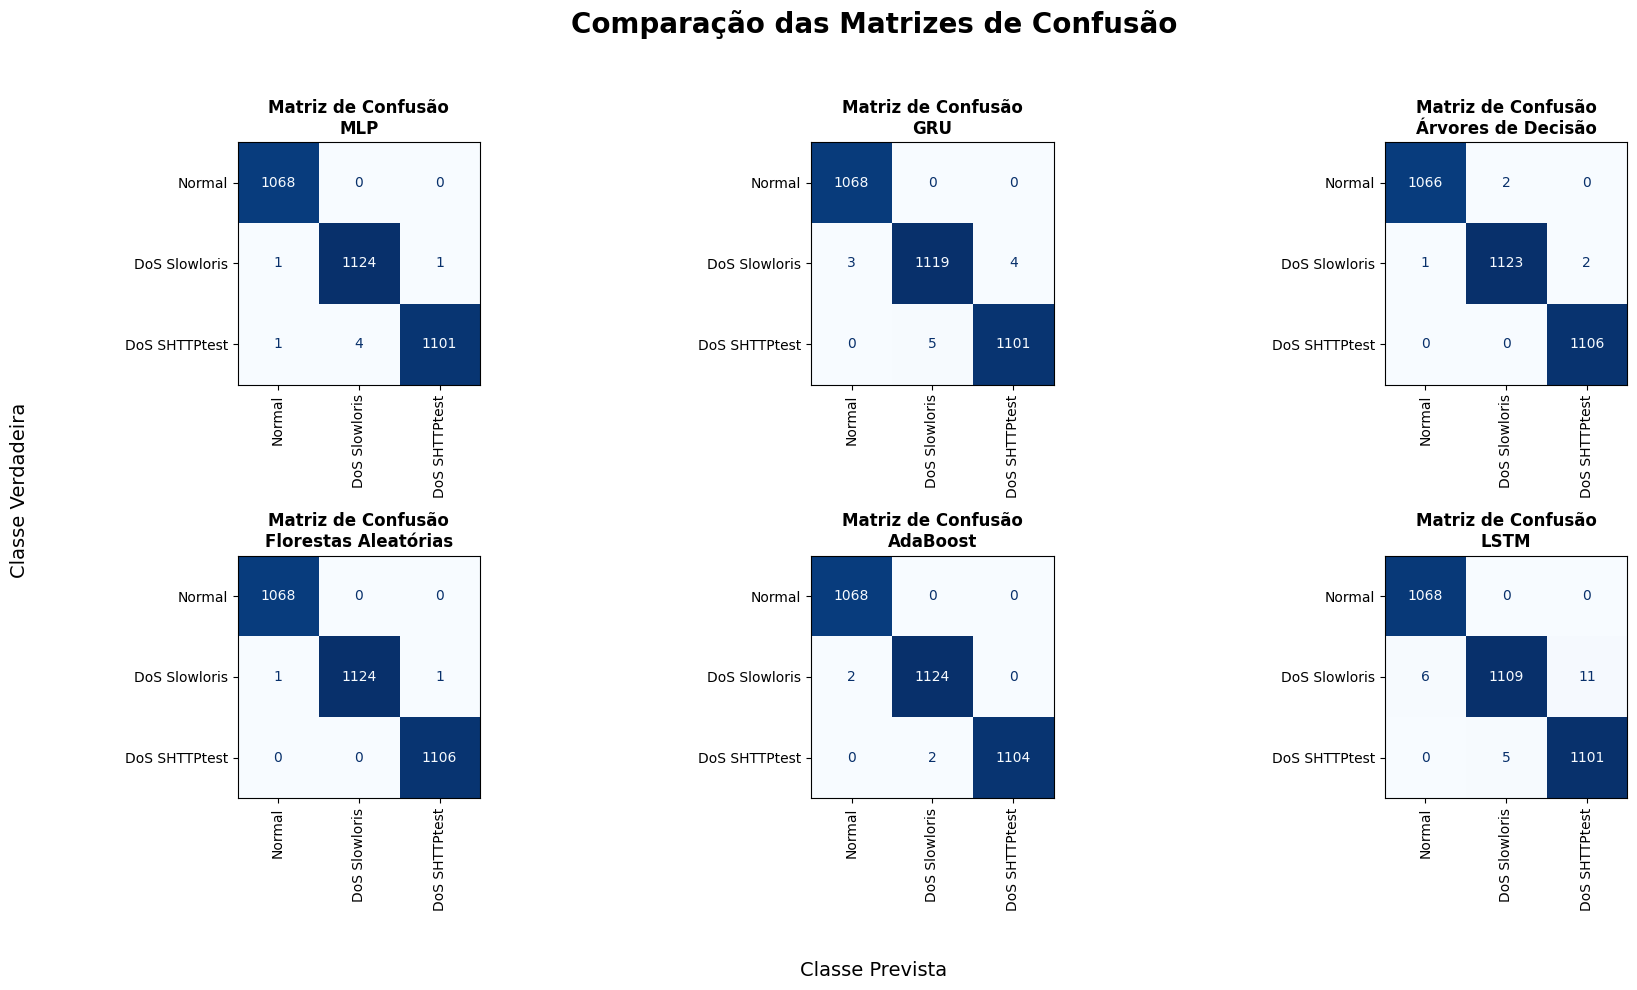

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

modelos = {
    "MLP": modelMLP,
    "GRU": modelGRU, 
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

nomes_classes = ['Normal', 'DoS Slowloris', 'DoS SHTTPtest']

x_test_sklearn = x_test 
x_test_lstm = x_test_lstm 

predicoes = {}

for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_probs = modelo.predict(x_test_lstm, verbose=0)
        predicoes[nome] = np.argmax(y_pred_probs, axis=1)

    else:
        predicoes[nome] = modelo.predict(x_test_sklearn)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

y_true_labels_1d = np.squeeze(y_test_lstm)

for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):

    if hasattr(modelo, 'classes_'):
        model_classes = modelo.classes_
    else: 
        model_classes = np.arange(len(nomes_classes))

    cm = confusion_matrix(y_true_labels_1d, predicoes[nome_modelo], labels=model_classes)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')

    # Configurações do Subplot
    ax.set_title(f"Matriz de Confusão\n{nome_modelo}", fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.supxlabel('Classe Prevista', fontsize=14)
fig.supylabel('Classe Verdadeira', fontsize=14)
fig.suptitle("Comparação das Matrizes de Confusão", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

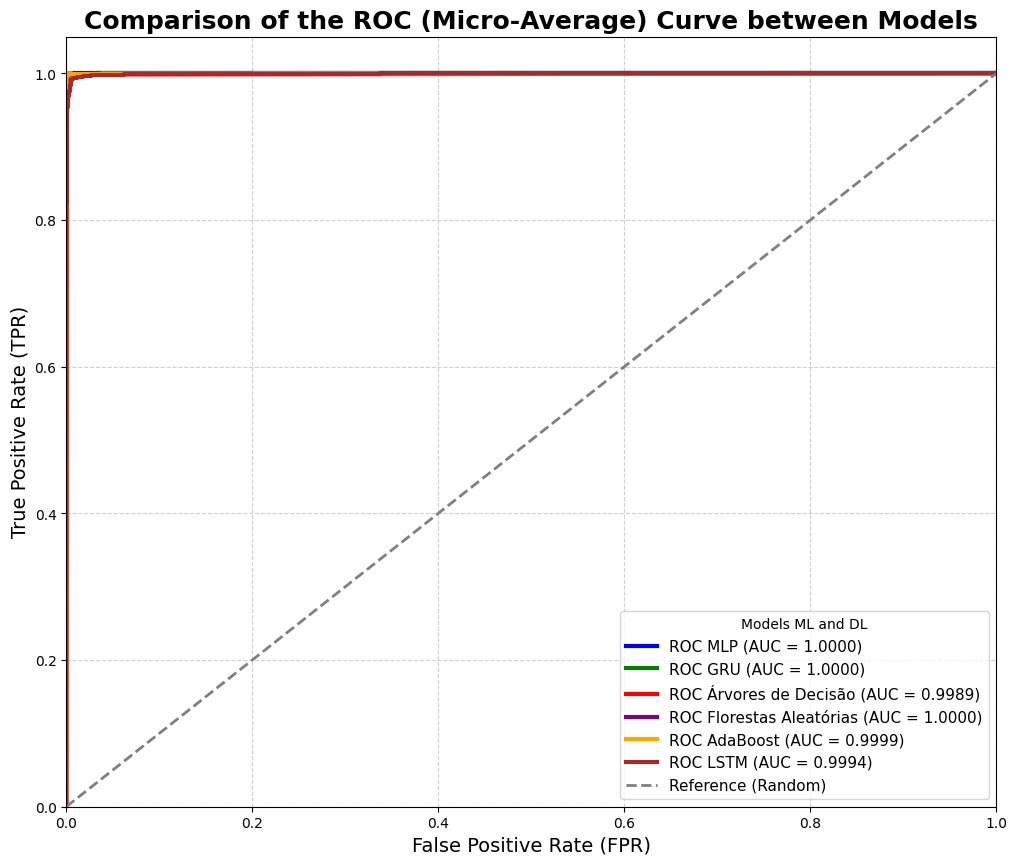

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import logging

# Configuração de logs
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')


modelos = {
    "MLP": modelMLP,
    "GRU": model_gru, 
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}

x_test_sklearn = x_test
x_test_lstm = x_test_lstm
y_test_reais = y_test

class_names = np.unique(y_test_reais)
y_test_bin = label_binarize(y_test_reais, classes=class_names)

plt.figure(figsize=(12, 10))

cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for i, (nome_modelo, modelo) in enumerate(modelos.items()):

    y_pred_prob = None

    if nome_modelo in ["LSTM", "GRU"]:
        y_pred_prob = modelo.predict(x_test_lstm, verbose=0)
    elif hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(x_test_sklearn)
    else:
        logging.warning(f"O modelo {nome_modelo} foi ignorado por não possuir método de probabilidades.")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        color=cores[i % len(cores)], 
        lw=3, 
        label=f'ROC {nome_modelo} (AUC = {roc_auc:.4f})' 
    )

plt.plot(
    [0, 1],
    [0, 1],
    color='gray',
    lw=2,
    linestyle='--',
    label='Reference (Random)'
)

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Eixos e Título
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Comparison of the ROC (Micro-Average) Curve between Models', fontsize=18, fontweight='bold')

# Legenda
plt.legend(loc="lower right", fontsize=11, title="Models ML and DL")

# Grid
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

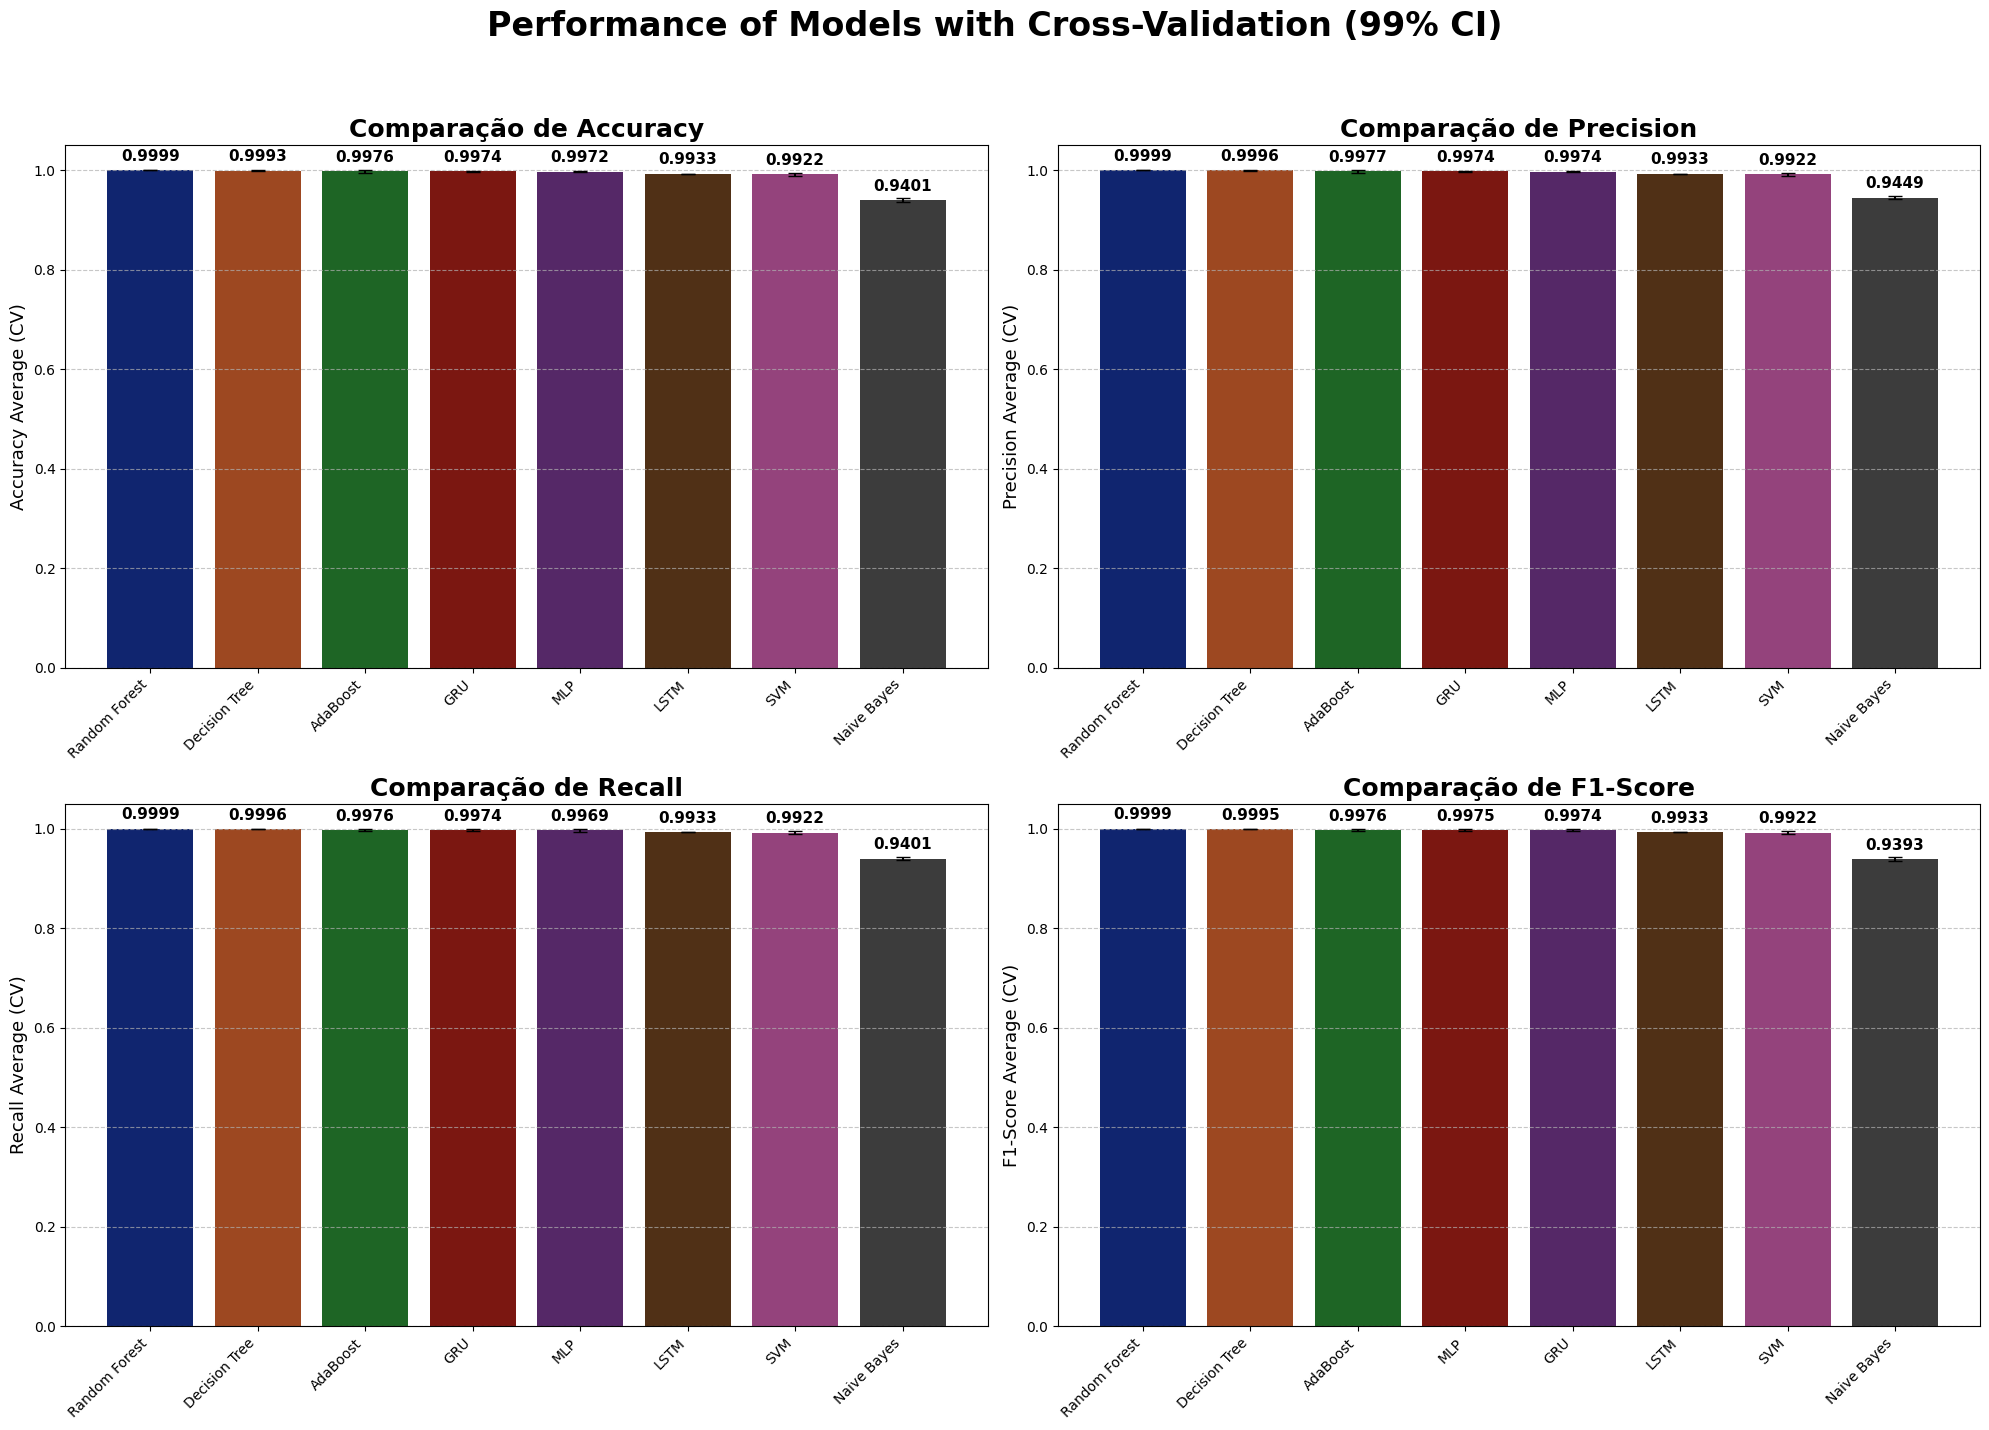

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem, t 

def calcular_ic_95(dados):
    dados = np.array(dados)
    if dados.size < 2:
        return 0
    return t.ppf(0.995, dados.size - 1) * sem(dados)

metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores_globais = all_scores_cv

plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) # Cria o i-ésimo subplot

    scores_da_metrica_atual = scores_globais[metrica]
    dados_plot = []

    for nome_modelo, scores in scores_da_metrica_atual.items():

        scores = np.array(scores)
        if scores.size == 0:
             continue

        media = np.mean(scores)
        ic = calcular_ic_95(scores) 
        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    if not dados_plot:
        plt.title(f"Dados indisponíveis para {metrica}", fontsize=16)
        continue

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5, lw=1.5)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', fontsize=11, fontweight='bold')


    plt.title(f"Comparação de {metrica}", fontsize=18, fontweight='bold')
    plt.ylim(0, 1.05) 
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average (CV)", fontsize=13)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

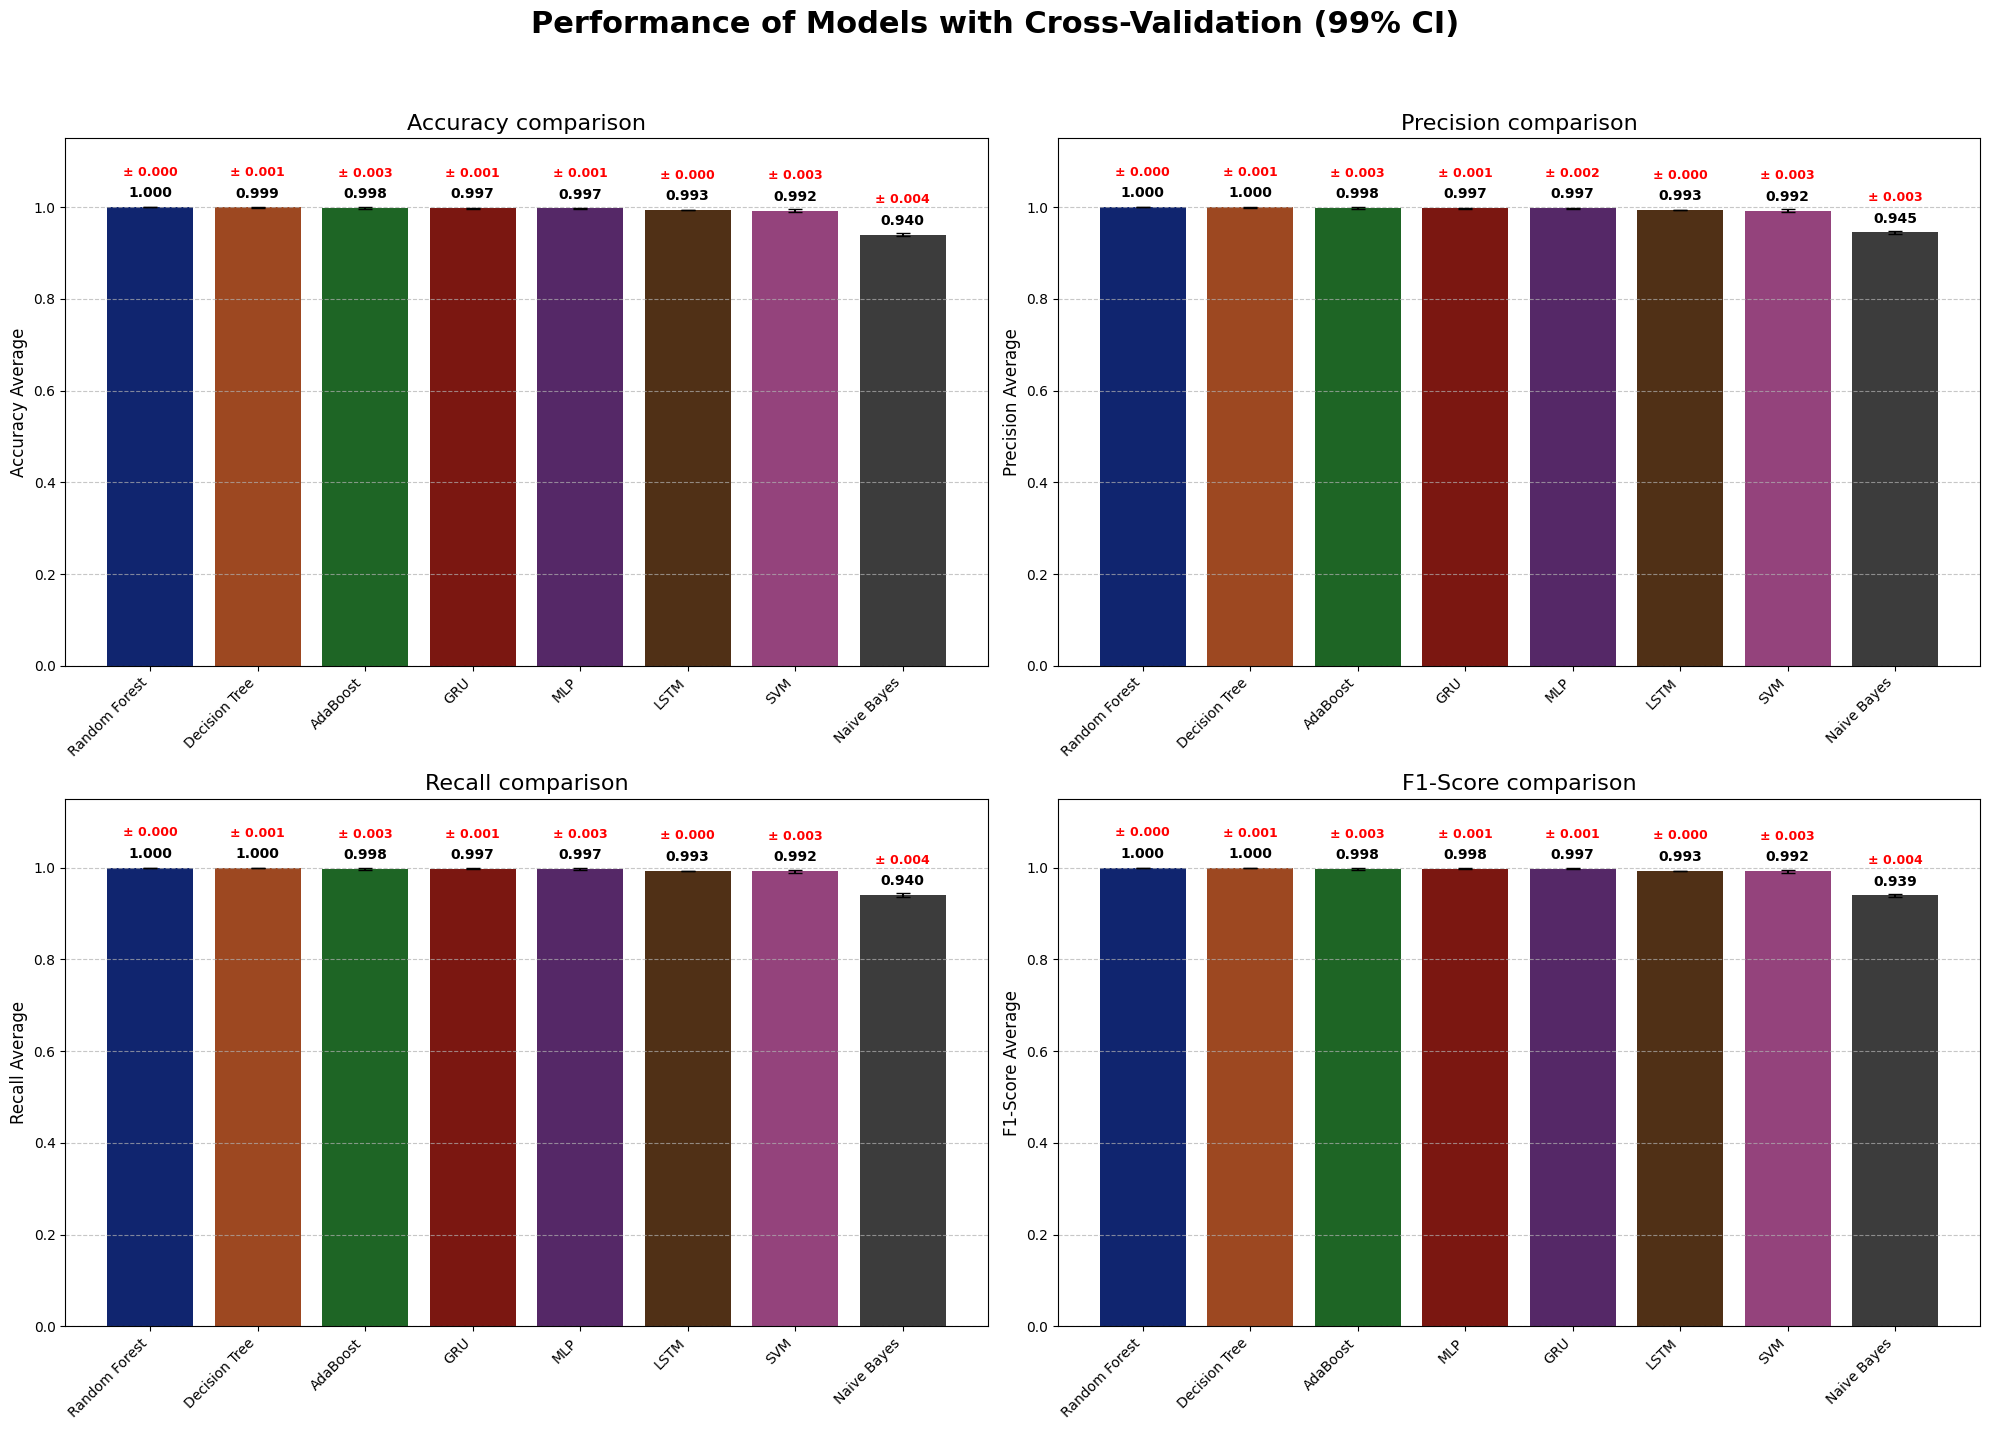

In [ ]:
metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]

plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) # Cria o i-ésimo subplot

    scores_da_metrica_atual = all_scores_cv[metrica]
    dados_plot = []
    for nome_modelo, scores in scores_da_metrica_atual.items():
        media = np.mean(scores)
        ic = calcular_ic_95(scores)
        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5)

    for j, p in enumerate(ax.patches):
        media_valor = p.get_height()

        ic_valor = df_plot['IC'].iloc[j]

        ax.annotate(f'{media_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points',
                    fontsize=10, fontweight='bold')

        ax.annotate(f'± {ic_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor), # A âncora é a mesma (topo da barra)
                    ha='center', va='center',
                    xytext=(0, 25), textcoords='offset points', # Posição vertical um pouco mais alta
                    fontsize=9, color='red', fontweight='bold')

    plt.title(f"{metrica} comparison", fontsize=16)
    plt.ylim(0, 1.15) # Aumentei um pouco o limite para o texto caber melhor
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
joblib.dump(modelMLP, '/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_mlp.joblib')
joblib.dump(svm, '/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_svm.joblib')
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_lstm.h5')
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_lstm.keras')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_gru.h5')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_gru.keras')
joblib.dump(modelDT, '/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_dt.joblib')
joblib.dump(modelRF, '/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_rf.joblib')
joblib.dump(adb, '/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_adb.joblib')

['/content/drive/MyDrive/Colab Notebooks/Wiley-POSEIDDON/CEN32/CICIDS2017_adb.joblib']

In [ ]:
modelLSTM_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_lstm.keras')
modelGRU_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 2/CICIDS2017_gru.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
data_score.to_csv('/poseiddon/GROUP A/CONFIGURATION 2/all_scores_metrics.csv', index=False)

In [ ]:
import time
import numpy as np

def calcular_tempo_inferencia(modelo, dados_para_teste):

  modelo.predict(dados_para_teste[:1])

  tempos = []
  for _ in range(100): 
      inicio = time.perf_counter()
      modelo.predict(dados_para_teste)
      fim = time.perf_counter()
      tempos.append(fim - inicio)

  tempo_medio_lote_ms = np.mean(tempos) * 1000
  tempo_por_previsao_ms = tempo_medio_lote_ms / len(dados_para_teste)

  return tempo_por_previsao_ms

In [ ]:
dicionario_modelos = {
    "MLP": modelMLP,
    "GRU": model_gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}

amostra_base_2d = x_test[:1000]

amostra_base_3d = amostra_base_2d.reshape((amostra_base_2d.shape[0], amostra_base_2d.shape[1], 1))

tempos_resultados = {}

for nome_modelo, objeto_modelo in tqdm(dicionario_modelos.items()):
    print(f"Calculando tempo para o modelo: {nome_modelo}...")

    if nome_modelo in ["LSTM", "GRU"]:
        dados_para_teste = amostra_base_3d 
    else:
        dados_para_teste = amostra_base_2d 

    tempo_ms = calcular_tempo_inferencia(objeto_modelo, dados_para_teste)

    tempos_resultados[nome_modelo] = tempo_ms

    print(f"-> Tempo por previsão: {tempo_ms:.6f} ms\n")

print("\n--- Dicionário Final com os Tempos de Inferência ---")
print(tempos_resultados)

  0%|          | 0/6 [00:00<?, ?it/s]

Calculando tempo para o modelo: MLP...
-> Tempo por previsão: 0.002948 ms

Calculando tempo para o modelo: GRU...
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
df_tempos = pd.DataFrame(list(tempos_resultados.items()), columns=['Modelo', 'Tempo de Detecção (ms)'])

df_tempos = df_tempos.sort_values(by='Tempo de Detecção (ms)', ascending=True)

In [ ]:
df_tempos.to_csv('/poseiddon/GROUP A/CONFIGURATION 2/tempos_deteccao_cic2018.csv', index=False)

/tmp/ipython-input-2164449025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


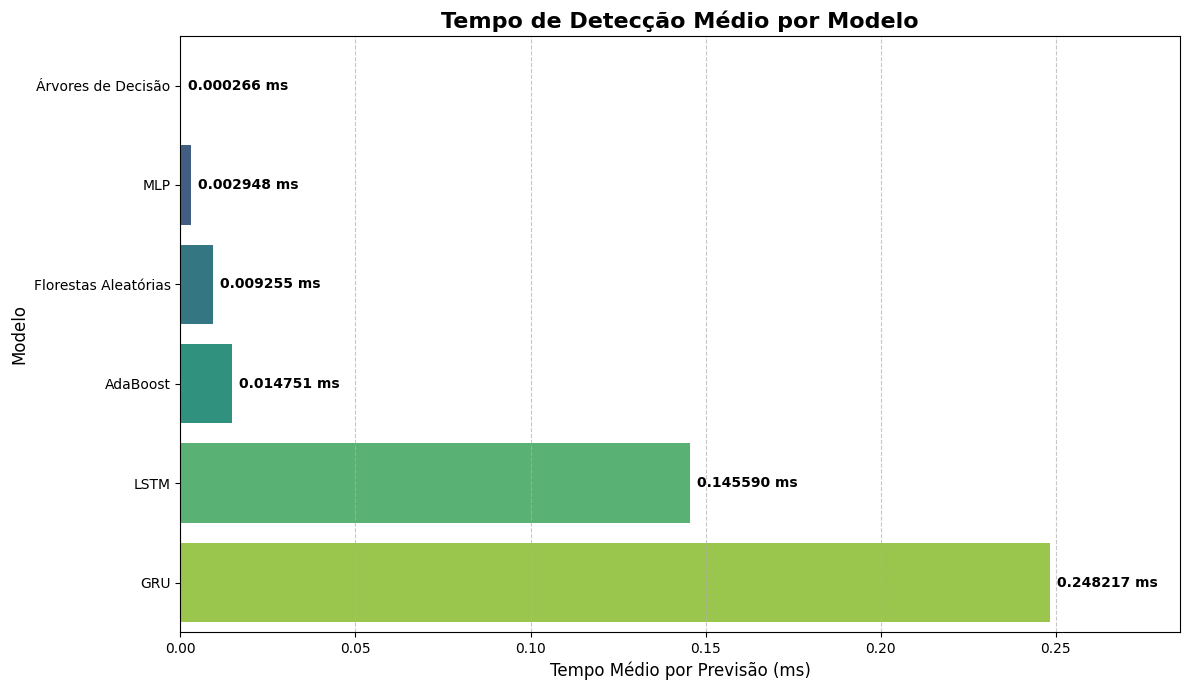

In [ ]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='Tempo de Detecção (ms)',
    y='Modelo',
    data=df_tempos,
    palette='viridis',
    orient='h' 
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.6f} ms',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                xytext = (5, 0),
                textcoords = 'offset points',
                fontsize=10, fontweight='bold')

# Configurações do gráfico
plt.title('Tempo de Detecção Médio por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Tempo Médio por Previsão (ms)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlim(0, df_tempos['Tempo de Detecção (ms)'].max() * 1.15)

plt.tight_layout()
plt.show()

In [169]:
df_resultados = data_score.copy()

In [191]:
df_resultados.rename(columns={'Algoritmo': 'Algorithm', 'Precisão': 'Precision', 'Acurácia': 'Accuracy', 'Sensibilidade':'Recall'}, inplace=True)
df_resultados.head()

,Accuracy,Precision,Recall,F1-Score
LSTM,0.9933333333333333,0.9933451551839287,0.9933333333333333,0.9933245805781942
MLP,"[0.996969696969697, 0.9975757575757576, 0.9975...","[0.9981916817359855, 0.9969740605979124, 1.0, ...","[0.9981818181818182, 0.9933333333333333, 1.0, ...","[0.9981818046580513, 0.9969729628042077, 0.998..."
Naive Bayes,"[0.9412121212121212, 0.9387878787878788, 0.940...","[0.945960808346787, 0.9437625394780749, 0.9450...","[0.9412121212121212, 0.9387878787878788, 0.940...","[0.9406384901598578, 0.9377397176820587, 0.939..."
Decision Tree,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9987889787163835, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9987878787878788, 1.0, ...","[0.9993939388930625, 1.0, 0.9987878747808532, ..."
Random Forest,"[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993950393224441, 1.0, 1.0, 0.9993950393224...","[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993939388930625, 1.0, 1.0, 0.9993939388930..."


In [172]:
df_tempos.rename(columns={'Modelo': 'Model', 'Tempo de Detecção (ms)': 'Model Inference (ms)'}, inplace=True)
df_tempos.head(10)

,Model,Model Inference (ms)
2,Árvores de Decisão,0.000266
0,MLP,0.002948
3,Florestas Aleatórias,0.009255
4,AdaBoost,0.014751
5,LSTM,0.145590
1,GRU,0.248217


In [ ]:
df_temp = df_tempos.set_index('Model')
algoritmos_a_remover = ['SVM', 'Naive Bayes']
df_filtrado = df_tempos[~df_tempos['Model'].isin(algoritmos_a_remover)].copy()

In [ ]:
import pandas as pd

nova_ordem = [
    'LSTM',
    'MLP',
    'Árvores de Decisão',
    'Florestas Aleatórias',
    'AdaBoost',
    'GRU'
]

df_reordenado = df_filtrado.set_index('Model')
df_reordenado = df_reordenado.reindex(nova_ordem)
df_reordenado = df_reordenado.reset_index()
print(df_reordenado)

                  Model  Model Inference (ms)
0                  LSTM              0.145590
1                   MLP              0.002948
2    Árvores de Decisão              0.000266
3  Florestas Aleatórias              0.009255
4              AdaBoost              0.014751
5                   GRU              0.248217


In [202]:
dt = pd.concat([df_resultados, df_reordenado['Model Inference (ms)']], axis=1)
dt.head()

,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
LSTM,0.9933333333333333,0.9933451551839287,0.9933333333333333,0.9933245805781942,NaN
MLP,"[0.996969696969697, 0.9975757575757576, 0.9975...","[0.9981916817359855, 0.9969740605979124, 1.0, ...","[0.9981818181818182, 0.9933333333333333, 1.0, ...","[0.9981818046580513, 0.9969729628042077, 0.998...",NaN
Naive Bayes,"[0.9412121212121212, 0.9387878787878788, 0.940...","[0.945960808346787, 0.9437625394780749, 0.9450...","[0.9412121212121212, 0.9387878787878788, 0.940...","[0.9406384901598578, 0.9377397176820587, 0.939...",NaN
Árvores de Decisão,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9987889787163835, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9987878787878788, 1.0, ...","[0.9993939388930625, 1.0, 0.9987878747808532, ...",NaN
Florestas Aleatórias,"[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993950393224441, 1.0, 1.0, 0.9993950393224...","[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993939388930625, 1.0, 1.0, 0.9993939388930...",NaN


In [ ]:
mapeamento_nomes = {
    'Decision Tree': 'Árvores de Decisão',
    'Random Forest': 'Florestas Aleatórias'
}

df_resultados.rename(index=mapeamento_nomes, inplace=True)

nova_ordem = [
    'LSTM',
    'MLP',
    'Árvores de Decisão',
    'Florestas Aleatórias',
    'AdaBoost',
    'GRU'
]

inference_series_aligned = df_filtrado.set_index('Model').reindex(nova_ordem)['Model Inference (ms)']

modelos_a_manter = inference_series_aligned.index.tolist()

df_metricas_sincronizadas = df_resultados.reindex(modelos_a_manter)

dt = pd.concat([df_metricas_sincronizadas, inference_series_aligned], axis=1)

print("DataFrame Final Corrigido (dt):")
print(dt)

DataFrame Final Corrigido (dt):
                                                               Accuracy  \
LSTM                                                 0.9933333333333333   
MLP                   [0.996969696969697, 0.9975757575757576, 0.9975...   
Árvores de Decisão    [0.9993939393939394, 0.9993939393939394, 1.0, ...   
Florestas Aleatórias  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
AdaBoost              [0.9981818181818182, 1.0, 0.9993939393939394, ...   
GRU                   [0.9977272727272727, 0.9992424242424243, 0.996...   

                                                              Precision  \
LSTM                                                 0.9933451551839287   
MLP                   [0.9981916817359855, 0.9969740605979124, 1.0, ...   
Árvores de Decisão    [0.9987889787163835, 0.9993950393224441, 1.0, ...   
Florestas Aleatórias  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   
AdaBoost              [0.9981851179673322, 1.0, 0.9993950393224441,

In [ ]:
dt.index.name = 'Algorithm'
dt.head(10)

,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
Algorithm,,,,,
LSTM,0.9933333333333333,0.9933451551839287,0.9933333333333333,0.9933245805781942,0.145590
MLP,"[0.996969696969697, 0.9975757575757576, 0.9975...","[0.9981916817359855, 0.9969740605979124, 1.0, ...","[0.9981818181818182, 0.9933333333333333, 1.0, ...","[0.9981818046580513, 0.9969729628042077, 0.998...",0.002948
Árvores de Decisão,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9987889787163835, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9987878787878788, 1.0, ...","[0.9993939388930625, 1.0, 0.9987878747808532, ...",0.000266
Florestas Aleatórias,"[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993950393224441, 1.0, 1.0, 0.9993950393224...","[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993939388930625, 1.0, 1.0, 0.9993939388930...",0.009255
AdaBoost,"[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981851179673322, 1.0, 0.9993950393224441, ...","[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981818151738193, 1.0, 0.9993939388930625, ...",0.014751
GRU,"[0.9977272727272727, 0.9992424242424243, 0.996...","[0.9977275292372517, 0.9992440747342709, 0.996...","[0.9977272727272727, 0.9992424242424243, 0.996...","[0.9977265224093396, 0.999242396351586, 0.9962...",0.248217


In [ ]:

dt_final_alinhado = dt.reset_index()
dt_final_alinhado.head(6)

,Algorithm,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
0,LSTM,0.9933333333333333,0.9933451551839287,0.9933333333333333,0.9933245805781942,0.145590
1,MLP,"[0.996969696969697, 0.9975757575757576, 0.9975...","[0.9981916817359855, 0.9969740605979124, 1.0, ...","[0.9981818181818182, 0.9933333333333333, 1.0, ...","[0.9981818046580513, 0.9969729628042077, 0.998...",0.002948
2,Árvores de Decisão,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9987889787163835, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9987878787878788, 1.0, ...","[0.9993939388930625, 1.0, 0.9987878747808532, ...",0.000266
3,Florestas Aleatórias,"[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993950393224441, 1.0, 1.0, 0.9993950393224...","[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993939388930625, 1.0, 1.0, 0.9993939388930...",0.009255
4,AdaBoost,"[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981851179673322, 1.0, 0.9993950393224441, ...","[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981818151738193, 1.0, 0.9993939388930625, ...",0.014751
5,GRU,"[0.9977272727272727, 0.9992424242424243, 0.996...","[0.9977275292372517, 0.9992440747342709, 0.996...","[0.9977272727272727, 0.9992424242424243, 0.996...","[0.9977265224093396, 0.999242396351586, 0.9962...",0.248217


In [208]:
dt_final_alinhado.insert(0, 'Configuration', 'Configuration 2')
dt_final_alinhado.head()

,Configuration,Algorithm,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
0,Configuration 2,LSTM,0.9933333333333333,0.9933451551839287,0.9933333333333333,0.9933245805781942,0.145590
1,Configuration 2,MLP,"[0.996969696969697, 0.9975757575757576, 0.9975...","[0.9981916817359855, 0.9969740605979124, 1.0, ...","[0.9981818181818182, 0.9933333333333333, 1.0, ...","[0.9981818046580513, 0.9969729628042077, 0.998...",0.002948
2,Configuration 2,Árvores de Decisão,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9987889787163835, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9987878787878788, 1.0, ...","[0.9993939388930625, 1.0, 0.9987878747808532, ...",0.000266
3,Configuration 2,Florestas Aleatórias,"[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993950393224441, 1.0, 1.0, 0.9993950393224...","[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993939388930625, 1.0, 1.0, 0.9993939388930...",0.009255
4,Configuration 2,AdaBoost,"[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981851179673322, 1.0, 0.9993950393224441, ...","[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981818151738193, 1.0, 0.9993939388930625, ...",0.014751


In [209]:
dt = dt_final_alinhado.copy()
dt.head(10)

,Configuration,Algorithm,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
0,Configuration 2,LSTM,0.9933333333333333,0.9933451551839287,0.9933333333333333,0.9933245805781942,0.145590
1,Configuration 2,MLP,"[0.996969696969697, 0.9975757575757576, 0.9975...","[0.9981916817359855, 0.9969740605979124, 1.0, ...","[0.9981818181818182, 0.9933333333333333, 1.0, ...","[0.9981818046580513, 0.9969729628042077, 0.998...",0.002948
2,Configuration 2,Árvores de Decisão,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9987889787163835, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9987878787878788, 1.0, ...","[0.9993939388930625, 1.0, 0.9987878747808532, ...",0.000266
3,Configuration 2,Florestas Aleatórias,"[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993950393224441, 1.0, 1.0, 0.9993950393224...","[0.9993939393939394, 1.0, 1.0, 0.9993939393939...","[0.9993939388930625, 1.0, 1.0, 0.9993939388930...",0.009255
4,Configuration 2,AdaBoost,"[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981851179673322, 1.0, 0.9993950393224441, ...","[0.9981818181818182, 1.0, 0.9993939393939394, ...","[0.9981818151738193, 1.0, 0.9993939388930625, ...",0.014751
5,Configuration 2,GRU,"[0.9977272727272727, 0.9992424242424243, 0.996...","[0.9977275292372517, 0.9992440747342709, 0.996...","[0.9977272727272727, 0.9992424242424243, 0.996...","[0.9977265224093396, 0.999242396351586, 0.9962...",0.248217


In [ ]:
dt.to_csv('/poseiddon/GROUP A/CONFIGURATION 2/all_results_cic2017_conf02.csv')
dt.to_csv('/poseiddon/GROUP A/CONFIGURATION 2/all_results_cic2017_conf02.csv')

# Teste do modelo treinado com CIC2017 no dataset CIC 2018

In [ ]:
%run '/poseiddon/GROUP B/CONFIGURATION 2/conf02_CIC2018_script.ipynb'